In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:


# # Try different encodings (e.g., 'utf-8', 'latin-1', 'ISO-8859-1') until you find the correct one
# encodings = ['utf-8', 'latin-1', 'ISO-8859-1']

# for encoding in encodings:
#     try:
#         df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding=encoding)
#         print(f"File read successfully with encoding: {encoding}")
#         break
#     except UnicodeDecodeError:
#         print(f"Error decoding with encoding: {encoding}. Trying the next one.")

# # If none of the encodings work, you might need to investigate the file and its actual encoding.


In [3]:
#Read in Data
df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding= 'latin-1')
df_raw_secondary = pd.read_csv('details.csv')

C:\Users\James\AppData\Local\Temp\ipykernel_20692\1419107746.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('ProfEngrsLandSurvyrsGeologist_Data.csv', encoding= 'latin-1')


In [4]:
#Remove Unused Columns

df_raw = df_raw[[#'Agency Name', 
    'License Type', 
    # 'Speciality Code', 
    'License Number',
    # 'Indiv/Org', 
    'Org/Last Name', 'First Name', 'Middle Name', 'Suffix',
    'Address Line 1', 'Address Line 2', 'City', 'County', 'State', 
    #'Zip',
       #'Country', 
       'Original Issue Date', 
       'Expiration Date', 
    #    'School', 'Year Graduated', 'Degree', 
    'License Status']]

In [5]:
#Make Civil, LS and Dual Dataframes

df_raw_ls = df_raw[df_raw['License Type'] == 'Land Surveyor']
df_raw_ls_active = df_raw_ls[df_raw_ls['License Status'] == 'Active']


In [6]:
df_raw_all_with_secondary = pd.concat([df_raw_ls, df_raw_secondary], ignore_index=True)

In [7]:
df_raw_all_with_secondary = df_raw_all_with_secondary.sort_values(by='License Number')

In [8]:
df_raw_all_with_secondary['County'] = df_raw_all_with_secondary['County'].str.title()

df_raw_all_with_secondary.head()

License Type  License Number Org/Last Name First Name Middle Name Suffix  \
4214          NaN            2650         JONES      AARON           F    NaN   
4215          NaN            2652       GRAVETT          S    WOODY JR    NaN   
4216          NaN            2653        NEWELL       TODD           B    NaN   
4217          NaN            2654        COLSON     GEORGE           P    NaN   
4218          NaN            2655         THENO    DOUGLAS           J    NaN   

              Address Line 1        Address Line 2 City        County State  \
4214       3 LA CRESCENTA DR     OROVILLE CA 95965  NaN         Butte   NaN   
4215          7700 HINDS AVE  N HOLLYWOOD CA 91605  NaN   Los Angeles   NaN   
4216      2264 STEARNLEE AVE   LONG BEACH CA 90815  NaN   Los Angeles   NaN   
4217  18989 SWEET WILLIAM CT       SONOMA CA 95476  NaN        Sonoma   NaN   
4218           RR 3 BOX 741A    HARLINGEN TX 78550  NaN  Out Of State   NaN   

     Original Issue Date Expiration Date License Status  \
4214            3/8/1951       6/30/1996      CANCELLED   
4215           3/23/1951       6/30/1988      CANCELLED   
4216           3/23/1951       6/30/1984      CANCELLED   
4217           3/31/1951       6/30/1992      CANCELLED   
4218           3/31/1951       6/30/1984      CANCELLED   

                                                    URL  
4214  https://search.dca.ca.gov/details/7500/L/2650/...  
4215  https://search.dca.ca.gov/details/7500/L/2652/...  
4216  https://search.dca.ca.gov/details/7500/L/2653/...  
4217  https://search.dca.ca.gov/details/7500/L/2654/...  
4218  https://search.dca.ca.gov/details/7500/L/2655/...

In [9]:
duplicates = df_raw_all_with_secondary['License Number'].duplicated(keep=False)
duplicate_license_numbers = df_raw_all_with_secondary[duplicates]['License Number']
# Convert to a list
duplicate_license_numbers_list = duplicate_license_numbers.tolist()
print(duplicate_license_numbers)

Series([], Name: License Number, dtype: int64)


In [10]:
df_raw_all_with_secondary.to_csv("all_with_nonactive.csv")

In [11]:

# Extracting license numbers
license_numbers_selected = df_raw_all_with_secondary['License Number']

# Finding missing license numbers between 3000 and 9863
all_license_range_selected = set(range(2650, 9843))
missing_license_numbers_selected = all_license_range_selected - set(license_numbers_selected)

# Sorting the missing license numbers for easier viewing
sorted_missing_license_numbers_selected = sorted(list(missing_license_numbers_selected))

sorted_missing_license_numbers_selected[:10]  # Displaying the first 10 for brevity

# Convert the missing license numbers to a DataFrame
missing_license_selected_df = pd.DataFrame(sorted_missing_license_numbers_selected, columns=['Missing License Numbers'])

# Save the DataFrame to a CSV file
output_file_selected_path = 'missing_license_numbers_selected.csv'
missing_license_selected_df.to_csv(output_file_selected_path, index=False)

output_file_selected_path


'missing_license_numbers_selected.csv'

In [12]:
df_raw_ls_non_active = df_raw_all_with_secondary[df_raw_all_with_secondary['License Status'] != 'Active']

In [13]:
def calculate_average_license_age(df, date_column='Original Issue Date'):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Calculate the difference between today and the 'Original Issue Date' to get the age of licensure
    df['License Age'] = (datetime.now() - df[date_column]).dt.days

    # Convert days to years
    days_in_year = 365.25  # Accounting for leap years
    df['License Age'] = df['License Age'] / days_in_year

    # Calculate the average license age for the entire DataFrame
    average_license_age = df['License Age'].mean()

    return average_license_age

ls_average_age = calculate_average_license_age(df_raw_ls)
print(f'Average License Age for Surveyors: {ls_average_age:.2f} years')


C:\Users\James\AppData\Local\Temp\ipykernel_20692\915263461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_20692\915263461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['License Age'] = (datetime.now() - df[date_column]).dt.days
C:\Users\James\AppData\Local\Temp\ipykernel_20692\915263461.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Average License Age for Surveyors: 24.08 years


In [14]:
def process_counts(df):
    # Ensure 'County' is of categorical type
    df['County'] = df['County'].astype('category')

    # Define new categories to be added
    new_categories = ['out_of_state', 'OUT OF STATE', 'OUT OF COUNTRY']

    # Add only those new categories which are not already present
    for category in new_categories:
        if category not in df['County'].cat.categories:
            df['County'] = df['County'].cat.add_categories([category])

    # Replace missing or blank values with 'out_of_state'
    df['County'] = df['County'].fillna('out_of_state')

    # Group by county and count the number of surveyors in each county
    county_counts = df['County'].value_counts().reset_index()
    county_counts.columns = ['County', 'Count']

    # Sort the DataFrame by county names
    county_counts = county_counts.sort_values(by='County').reset_index(drop=True)

    return county_counts

In [15]:
county_surveyor_counts = process_counts(df_raw_ls)
county_surveyor_counts.to_csv("countysurveyorcounts.csv")
county_surveyor_counts_all_time = process_counts(df_raw_all_with_secondary)


# Calculating the difference
county_surveyor_counts_removed = county_surveyor_counts_all_time.merge(county_surveyor_counts, on='County', how='inner',)
county_surveyor_counts_removed['Count'] = county_surveyor_counts_removed['Count_x'] - county_surveyor_counts_removed['Count_y']

# Keep only rows where 'Count' is non-negative
county_surveyor_counts_removed = county_surveyor_counts_removed[county_surveyor_counts_removed['Count'] >= 0]

C:\Users\James\AppData\Local\Temp\ipykernel_20692\688288071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].astype('category')
C:\Users\James\AppData\Local\Temp\ipykernel_20692\688288071.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].cat.add_categories([category])
C:\Users\James\AppData\Local\Temp\ipykernel_20692\688288071.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [16]:
county_surveyor_counts_removed.head(50)

County  Count_x  Count_y  Count
0           Alameda      142       99     43
1            Alpine        1        1      0
2            Amador       21       13      8
3             Butte       68       43     25
4         Calaveras       24       10     14
5      Contra Costa      189      131     58
6         Del Norte        5        4      1
7         El Dorado       91       57     34
8            Fresno      149      120     29
9             Glenn       11        8      3
10         Humboldt       69       42     27
11         Imperial       18       14      4
12             Inyo       26       16     10
13             Kern      110       72     38
14            Kings        6        4      2
15             Lake       23        8     15
16           Lassen       10        7      3
17      Los Angeles      569      322    247
18           Madera       28       23      5
19            Marin       37       17     20
20         Mariposa        8        4      4
21        Mendocino       34       21     13
22           Merced       27       19      8
23            Modoc        3        2      1
24             Mono        4        3      1
25         Monterey       53       33     20
26             Napa       34       27      7
27           Nevada       88       54     34
28           Orange      402      280    122
29           Placer      155      107     48
30           Plumas       10        8      2
31        Riverside      354      258     96
32       Sacramento      268      154    114
33       San Benito       11        9      2
34   San Bernardino      291      199     92
35        San Diego      543      366    177
36    San Francisco       51       32     19
37      San Joaquin       66       48     18
38  San Luis Obispo      154      104     50
39        San Mateo       60       34     26
40    Santa Barbara       71       50     21
41      Santa Clara      101       59     42
42       Santa Cruz       62       41     21
43           Shasta      115       75     40
44           Sierra        1        1      0
45         Siskiyou       31       18     13
46           Solano       39       32      7
47           Sonoma      162      114     48
48       Stanislaus       83       62     21
49           Sutter       43       33     10

In [17]:
# Load the shapefile for California counties
california_counties_shapefile = "CA_Counties/CA_Counties_TIGER2016.shp"
california_counties_map = gpd.read_file(california_counties_shapefile)

In [18]:
def plot_count_map(geo_df, count_df, count_word, geo_column='NAME', count_column='County'):
    # Merge the surveyor counts DataFrame with the geographical data
    merged_data = geo_df.merge(count_df, left_on=geo_column, right_on=count_column)

    # print("Merged Data:\n", merged_data)  # Debug print

    if merged_data.empty:
        print("No data available for", count_word, "Count.")
        return
    # Sort the DataFrame by 'Surveyor Count' in descending order
    merged_data = merged_data.sort_values(by='Count', ascending=False)

    # Create a figure with two subplots (one for the map and one for the table)
    fig, (ax_map, ax_table) = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [3, 1]})
    
    cmap = "YlOrRd"  

    # Plot the background GeoDataFrame in grayscale
    geo_df.plot(ax=ax_map, color='gray', edgecolor='black')
    
    # Plot the map
    divider = make_axes_locatable(ax_map)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    merged_data.plot(column='Count', cmap=cmap, linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True, cax=cax)

    # Add annotations with surveyor counts
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Count']):
        ax_map.text(x, y, f'{label}', fontsize=9, ha='center', color='black')

    # Create a table for the legend
    legend_table = ax_table.table(cellText=merged_data[['NAME', 'Count']].values,
                                colLabels=['County', count_word],
                                cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Style the table
    legend_table.auto_set_font_size(False)
    legend_table.set_fontsize(10)

    # Add labels and title
    ax_map.set_title(f'{count_word} Count by County in California', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    ax_map.set_axis_off()

    # Remove axes for the table subplot
    ax_table.axis('off')

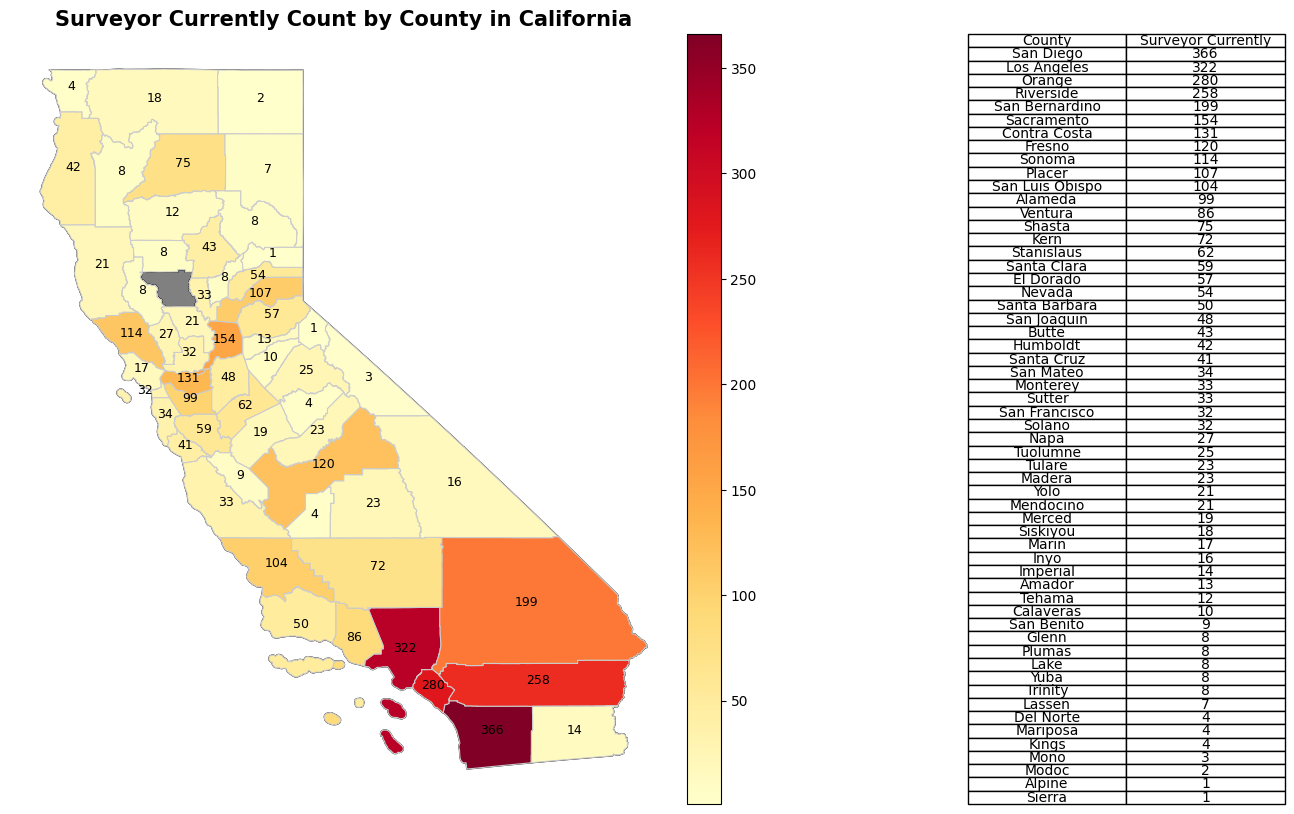

In [19]:
plot_count_map(california_counties_map, county_surveyor_counts, 'Surveyor Currently')

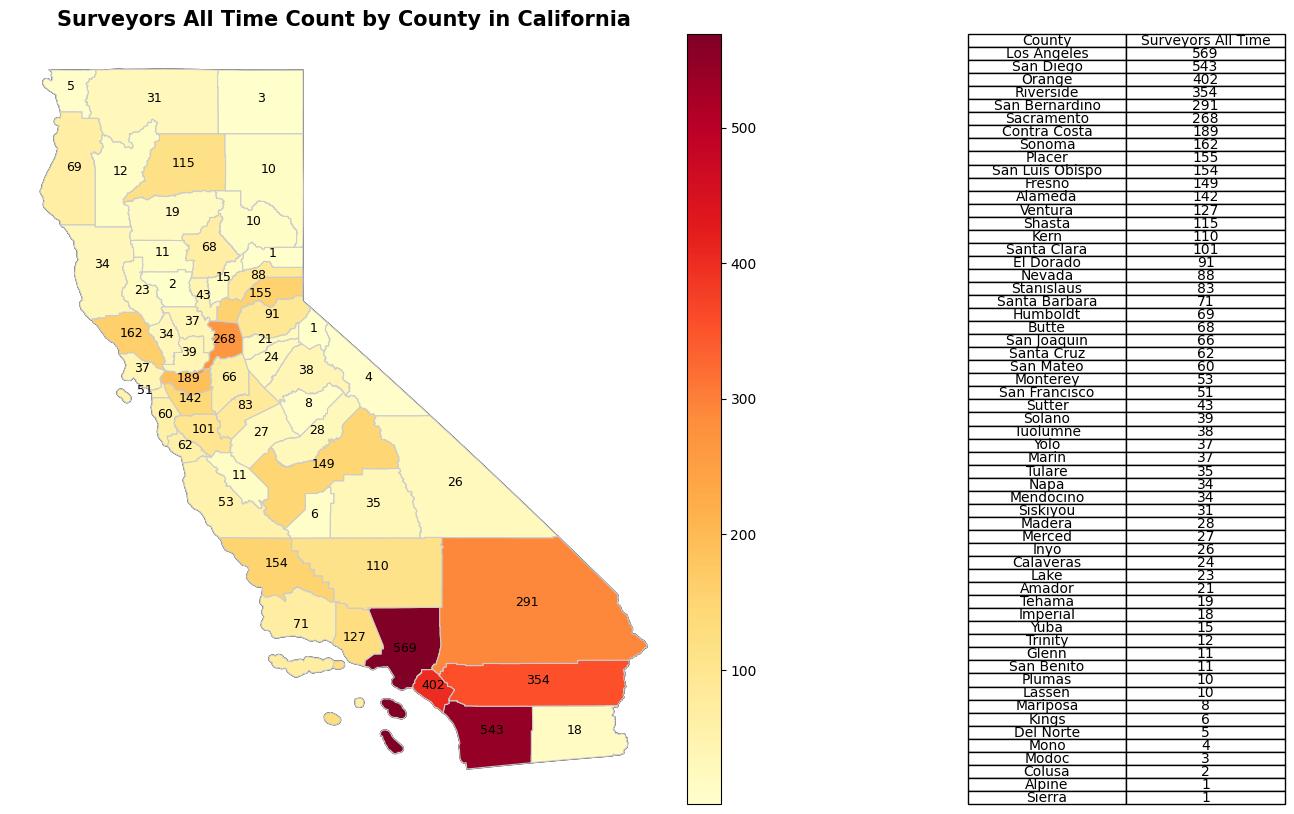

In [20]:
plot_count_map(california_counties_map, county_surveyor_counts_all_time, 'Surveyors All Time')

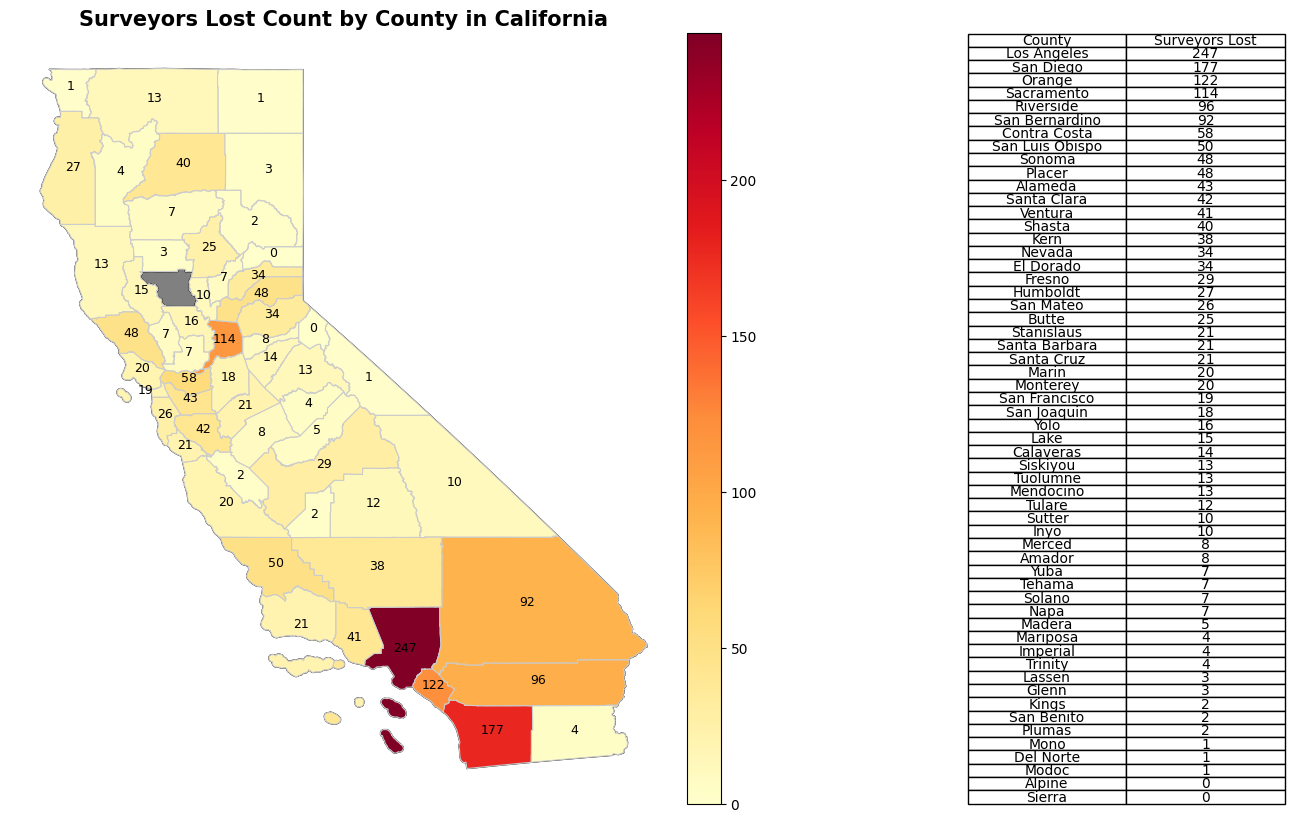

In [21]:
plot_count_map(california_counties_map, county_surveyor_counts_removed, 'Surveyors Lost')

In [22]:
def calculate_average_license_age_by_county(df, date_column='Original Issue Date', county_column='County'):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Calculate the difference between today and the 'Original Issue Date' to get the age of licensure
    df['License Age'] = (datetime.now() - df[date_column]).dt.days

    # Convert days to years
    days_in_year = 365.25  # Accounting for leap years
    df['License Age'] = df['License Age'] / days_in_year

    # Group by county and calculate the average license age
    average_license_age_by_county = df.groupby(county_column)['License Age'].mean().reset_index()
    
    # Round the 'Average License Age' column to two decimal places
    average_license_age_by_county['Average License Age'] = average_license_age_by_county['License Age'].round(2)
    
    # Drop the intermediate 'License Age' column
    average_license_age_by_county = average_license_age_by_county.drop(columns='License Age')

    # Sort the DataFrame by county names
    average_license_age_by_county = average_license_age_by_county.sort_values(by=county_column).reset_index(drop=True)

    return average_license_age_by_county


In [23]:
ls_average_license_age_by_county = calculate_average_license_age_by_county(df_raw_ls)

C:\Users\James\AppData\Local\Temp\ipykernel_20692\4110610383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_20692\4110610383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['License Age'] = (datetime.now() - df[date_column]).dt.days
C:\Users\James\AppData\Local\Temp\ipykernel_20692\4110610383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [24]:
def plot_age_map(geo_df, count_df, age_word, geo_column='NAME', count_column='County'):
    # Merge the surveyor counts DataFrame with the geographical data
    merged_data = geo_df.merge(count_df, left_on=geo_column, right_on=count_column)

    # print("Merged Data:\n", merged_data)  # Debug print

    if merged_data.empty:
        print("No data available for", age_word, "Average License Age.")
        return
    # Sort the DataFrame by 'Surveyor Count' in descending order
    merged_data = merged_data.sort_values(by='Average License Age', ascending=False)

    # Create a figure with two subplots (one for the map and one for the table)
    fig, (ax_map, ax_table) = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [3, 1]})
    
    cmap = "YlOrRd"  

    # Plot the background GeoDataFrame in grayscale
    geo_df.plot(ax=ax_map, color='gray', edgecolor='black')
    
    # Plot the map
    divider = make_axes_locatable(ax_map)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    merged_data.plot(column='Average License Age', cmap=cmap, linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True, cax=cax)

    # Add annotations with surveyor counts
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Average License Age']):
        ax_map.text(x, y, f'{label}', fontsize=9, ha='center', color='black')

    # Create a table for the legend
    legend_table = ax_table.table(cellText=merged_data[['NAME', 'Average License Age']].values,
                                colLabels=['County', f'{age_word} (Years)'],
                                cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Style the table
    legend_table.auto_set_font_size(False)
    legend_table.set_fontsize(10)

    # Add labels and title
    ax_map.set_title(f'{age_word} Average License Age by County in California (Years)', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    ax_map.set_axis_off()

    # Remove axes for the table subplot
    ax_table.axis('off')

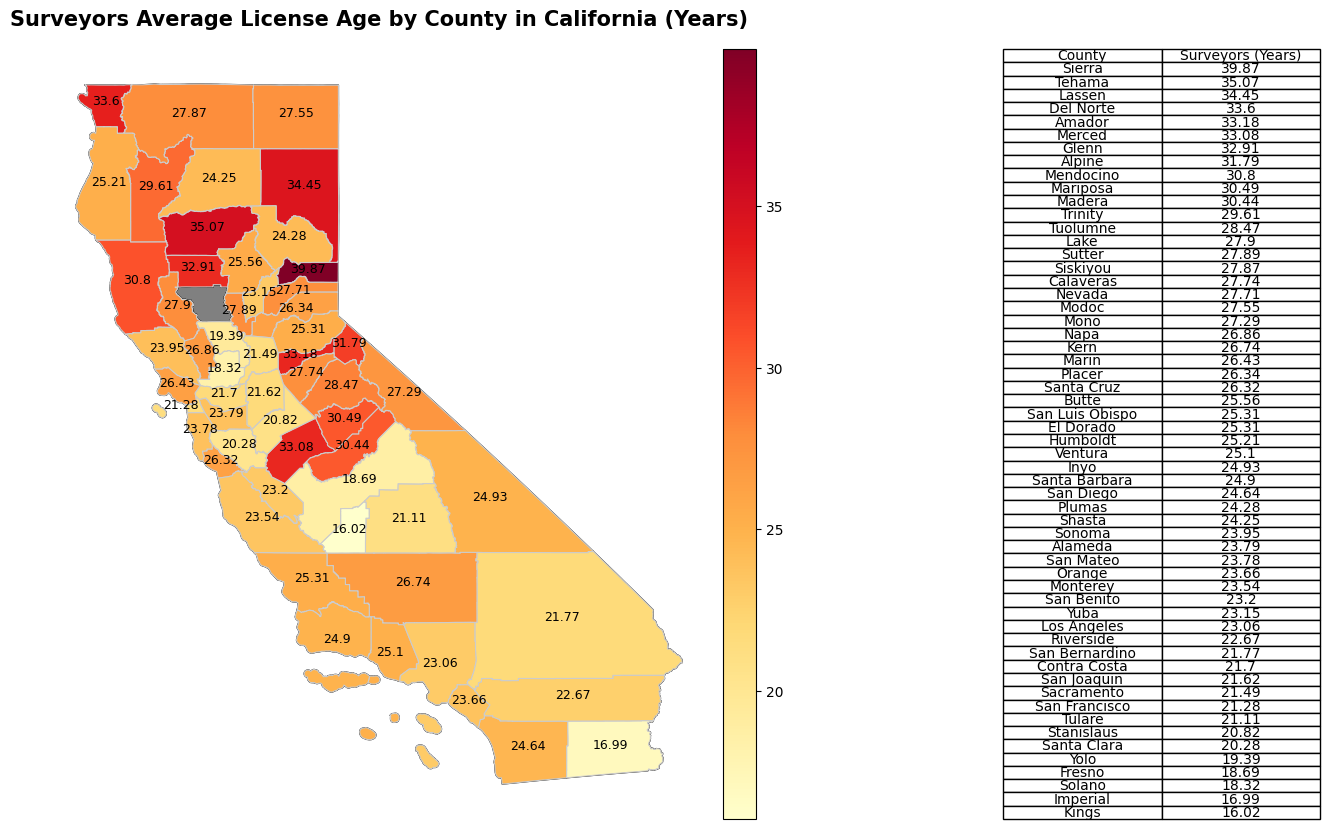

In [25]:
plot_age_map(california_counties_map, ls_average_license_age_by_county, 'Surveyors')

In [26]:
df_raw_ls_active.describe()

License Number
count     3866.000000
mean      7535.854630
std       1605.468667
min       3140.000000
25%       6351.250000
50%       7823.500000
75%       8872.750000
max       9863.000000

In [27]:
# def licenses_issued_per_year(df, date_column='Original Issue Date'):
#     # Convert 'Original Issue Date' to datetime
#     df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

#     # Extract the year from the 'Original Issue Date'
#     df['Year'] = df[date_column].dt.year

#     # Count the occurrences of each year
#     licenses_per_year = df['Year'].value_counts().reset_index()
#     licenses_per_year.columns = ['Year', 'Number of Licenses Issued']

#     # Sort the DataFrame by year
#     licenses_per_year = licenses_per_year.sort_values(by='Year').reset_index(drop=True)

#     return licenses_per_year

In [28]:
def plot_licenses_per_year_with_moving_average(df, nameword, title, yaxis_name, date_column='Original Issue Date', window=10):
    # Convert 'Original Issue Date' to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Extract the year from the 'Original Issue Date'
    df['Year'] = df[date_column].dt.year

    # Get the current year and set the end year to the end of the last year
    current_year = datetime.now().year
    end_year = current_year - 1

    # Filter the DataFrame to include only data up to the end of the last year
    df = df[df['Year'] <= end_year]

    # Count the occurrences of each year
    licenses_per_year = df['Year'].value_counts().reset_index()
    licenses_per_year.columns = ['Year', 'Number of Licenses Issued']

    # Sort the DataFrame by year
    licenses_per_year = licenses_per_year.sort_values(by='Year').reset_index(drop=True)

    # Calculate the moving average
    licenses_per_year['Moving Average'] = licenses_per_year['Number of Licenses Issued'].rolling(window=window, min_periods=1).mean()

    # Plot the data
    plt.plot(licenses_per_year['Year'], licenses_per_year['Number of Licenses Issued'], marker='o', label='Number of Licenses Issued')
    plt.plot(licenses_per_year['Year'], licenses_per_year['Moving Average'], 'r--', label=f'Moving Average ({window}-period)')

    plt.title(f'{title}')
    plt.xlabel('Year')
    plt.ylabel(f'{yaxis_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

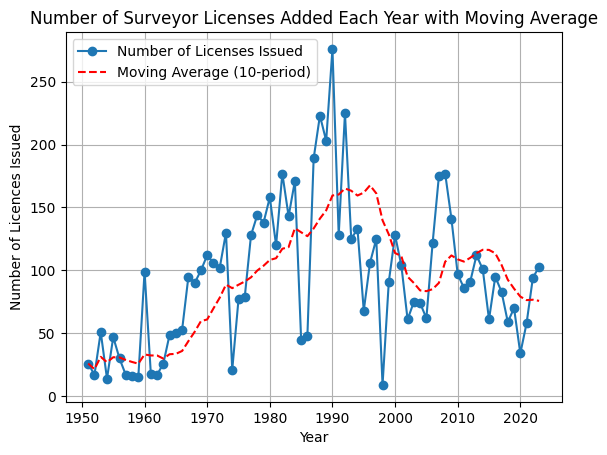

In [29]:
plot_licenses_per_year_with_moving_average(df_raw_all_with_secondary, "Surveyor", 'Number of Surveyor Licenses Added Each Year with Moving Average', "Number of Licences Issued")

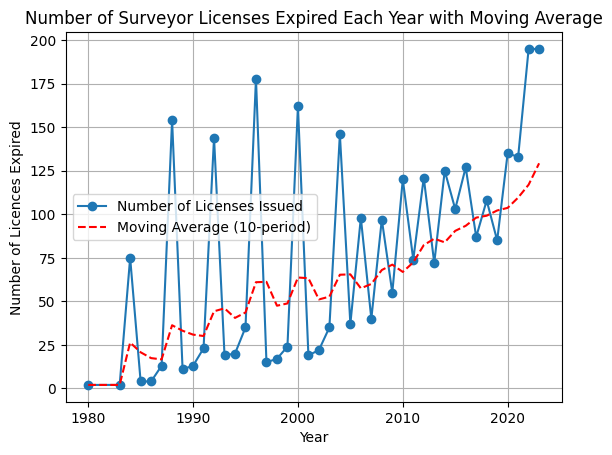

In [30]:
plot_licenses_per_year_with_moving_average(df_raw_all_with_secondary, "Surveyor", 'Number of Surveyor Licenses Expired Each Year with Moving Average', "Number of Licences Expired",  date_column='Expiration Date')

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_active_licenses_with_moving_average(df, nameword, issue_date_column, expiration_date_column, start_licenses, expire_years, window=10):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

    # Get the current year and set the end year to the end of the last year
    current_year = datetime.now().year
    end_year = current_year - 1

    # Create a range of years from the earliest issue date to the end of last year
    start_year = int(df[issue_date_column].dt.year.min())
    years = range(start_year, end_year + 1)  # +1 to include end_year in the range


    # Determine the yearly decrease in licenses
    yearly_decrease = start_licenses / expire_years

    # Function to count active licenses for a given year
    def count_active_licenses(year):
        initial_licenses = max(start_licenses - (year - start_year) * yearly_decrease, 0)
        issued_after_start = len(df[(df[issue_date_column].dt.year <= year) & (df[expiration_date_column].dt.year > year)])
        return initial_licenses + issued_after_start

    # Calculate active licenses for each year
    active_per_year = [count_active_licenses(year) for year in years]

    # Create DataFrame for plotting
    plot_data = pd.DataFrame({'Year': years, 'Active Licenses': active_per_year})

    # Calculate the moving average
    plot_data['Moving Average'] = plot_data['Active Licenses'].rolling(window=window, min_periods=1).mean()

    # Plot the data
    plt.plot(plot_data['Year'], plot_data['Active Licenses'], marker='o', label='Active Licenses')
    plt.plot(plot_data['Year'], plot_data['Moving Average'], 'r--', label=f'Moving Average ({window}-period)')

    plt.title(f'Number of Active {nameword} Licenses Each Year with Moving Average (Up to {end_year})')
    plt.xlabel('Year')
    plt.ylabel('Number of Active Licenses')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_active_licenses_with_moving_average(df, 'Surveyor', 'Original Issue Date', 'Expiration Date', start_licenses=1000, expire_years=10)


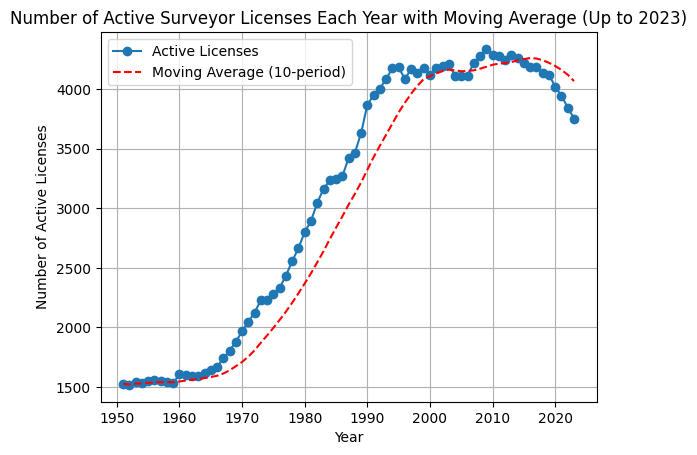

In [32]:
plot_active_licenses_with_moving_average(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', start_licenses=1500, expire_years=60)

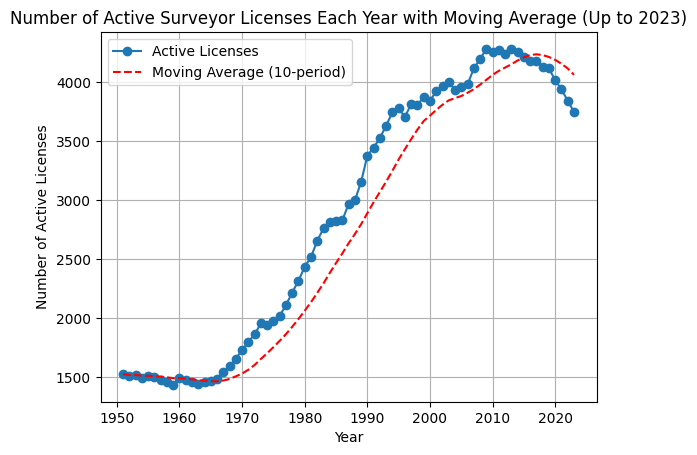

In [33]:
plot_active_licenses_with_moving_average(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', start_licenses=1500, expire_years=40)

In [34]:
names = ['REVOKED', 'VOLUNTARY SURRENDER OF LICENSE', 'DENIED']  # Replace 'Name1', 'Name2', 'Name3' with the actual names you want to filter by
df_raw_ls_bad_apples = df_raw_all_with_secondary[df_raw_all_with_secondary['License Status'].isin(names)]

C:\Users\James\AppData\Local\Temp\ipykernel_20692\469537028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\James\AppData\Local\Temp\ipykernel_20692\469537028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df[date_column].dt.year


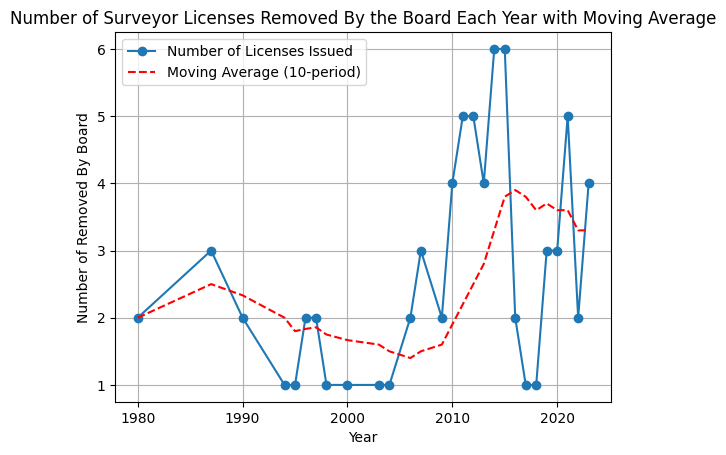

In [35]:
plot_licenses_per_year_with_moving_average(df_raw_ls_bad_apples, "Surveyor", 'Number of Surveyor Licenses Removed By the Board Each Year with Moving Average', "Number of Removed By Board",  date_column='Expiration Date')

C:\Users\James\AppData\Local\Temp\ipykernel_20692\688288071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].astype('category')
C:\Users\James\AppData\Local\Temp\ipykernel_20692\688288071.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].fillna('out_of_state')


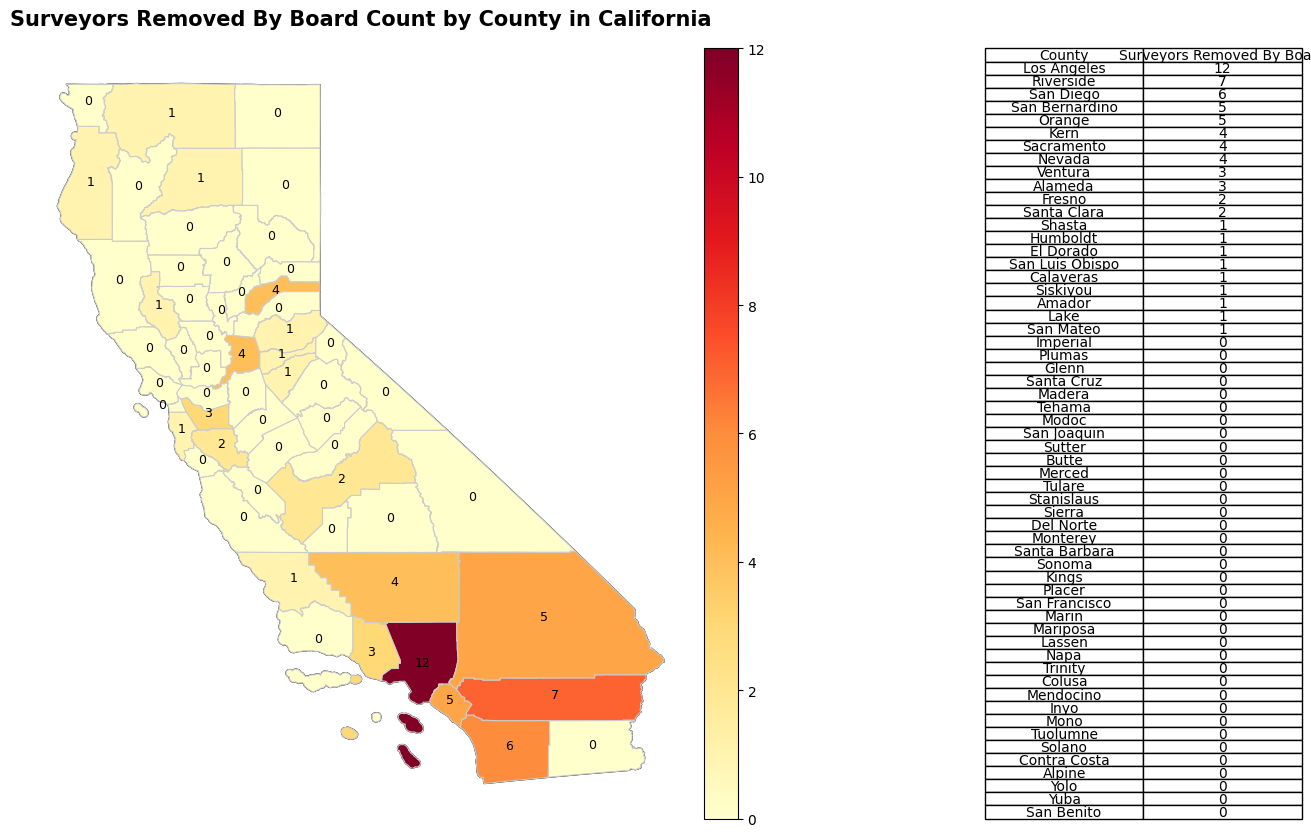

In [36]:
# names_to_remove = ['OUT OF COUNTRY', 'OUT OF STATE']  # Replace 'Name1', 'Name2', 'Name3' with the actual names you want to filter by
# df_raw_ls_bad_apples_clean = df_raw_ls_bad_apples[~df_raw_ls_bad_apples['County'].isin(names_to_remove)]
county_surveyor_counts_bad_apples = process_counts(df_raw_ls_bad_apples)
plot_count_map(california_counties_map, county_surveyor_counts_bad_apples, 'Surveyors Removed By Board')

In [37]:
# import pandas as pd
# import numpy as np
# from datetime import datetime
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# def plot_active_licenses_with_projection_and_projected_table(df, nameword, issue_date_column, expiration_date_column, start_licenses, expire_years, window=10, projection_years=10, degree=3):
#     # Convert date columns to datetime
#     df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
#     df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

#     # Get the current year and set the end year for historical data
#     current_year = datetime.now().year
#     historical_end_year = current_year - 1
#     projection_end_year = current_year + projection_years

#     # Create a range of years from the earliest issue date to the end of the historical data
#     start_year = int(df[issue_date_column].dt.year.min())
#     historical_years = range(start_year, historical_end_year + 1)
#     projection_years_range = range(current_year, projection_end_year + 1)

#     # Determine the yearly decrease in licenses
#     yearly_decrease = start_licenses / expire_years

#     # Function to count active licenses for a given year
#     def count_active_licenses(year):
#         initial_licenses = max(start_licenses - (year - start_year) * yearly_decrease, 0)
#         issued_after_start = len(df[(df[issue_date_column].dt.year <= year) & (df[expiration_date_column].dt.year > year)])
#         return initial_licenses + issued_after_start

#     # Calculate active licenses for each year in the historical range
#     active_per_year = [count_active_licenses(year) for year in historical_years]

#     # Create DataFrame for historical data
#     historical_data = pd.DataFrame({'Year': historical_years, 'Active Licenses': active_per_year})

#     # Calculate the moving average for historical data
#     historical_data['Moving Average'] = historical_data['Active Licenses'].rolling(window=window, min_periods=1).mean()
    
#     # Fit a polynomial regression model to the moving average of historical data
#     X = np.array(historical_years).reshape(-1, 1)
#     y = historical_data['Moving Average'].values
#     polynomial_features = PolynomialFeatures(degree=degree)
#     X_poly = polynomial_features.fit_transform(X)
#     model = LinearRegression().fit(X_poly, y)

#     # Compute R² value
#     r2_value = model.score(X_poly, y)

#     # Calculate fitted values (trend line) for historical years
#     fitted_values = model.predict(X_poly)
#     historical_data['Fitted Trend Line'] = fitted_values

#     # Calculate the error between Moving Average and Fitted Trend Line for historical data
#     historical_data['Error'] = np.abs(historical_data['Moving Average'] - historical_data['Fitted Trend Line'])

#     # Project the moving average for the next 10 years
#     projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
#     projection_X_poly = polynomial_features.transform(projection_X)
#     projection_Y = model.predict(projection_X_poly)

#     # Combine the fitted trend line and projected moving average into one column
#     all_years = list(historical_years) + list(projection_years_range)
#     all_fitted_values = list(fitted_values) + list(projection_Y)
#     combined_data = pd.DataFrame({'Year': all_years, 'Active Licenses': active_per_year + [np.nan] * len(projection_years_range),
#                                   'Moving Average': list(historical_data['Moving Average']) + [np.nan] * len(projection_years_range),
#                                   'Fitted Trend Line/Projection': all_fitted_values})

#     # Calculate error for the historical part only
#     combined_data['Error'] = np.abs(combined_data['Moving Average'] - combined_data['Fitted Trend Line/Projection']) if 'Moving Average' in combined_data else np.nan
#     combined_data['Error'][:len(historical_years)] = historical_data['Error']

#     # Plotting
#     fig, ax = plt.subplots(figsize=(12, 12))

#     # Plot for all data
#     ax.plot(historical_data['Year'], historical_data['Active Licenses'], marker='o', label='Active Licenses')
#     ax.plot(historical_data['Year'], historical_data['Moving Average'], 'r--', label='Historical Moving Average')
#     ax.plot(all_years, all_fitted_values, 'g--', label='Fitted Trend Line / Projected Moving Average')
#     ax.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
#     ax.set_title(f'Number of Active {nameword} Licenses in California with Historical Data and Polynomial Projection ({projection_years} Years)')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Number of Active Licenses')
#     ax.legend()
#     ax.grid(True)

#     # Filter the data for the table to include from the year 1981
#     table_data = combined_data[combined_data['Year'] >= 1981].round(2)

#     # Displaying the data table from 1981 onwards
#     plt.figure(figsize=(15, 10))
#     table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1.2, 1.2)
#     # plt.gca().set_title('Data Table (From 1981 Onwards)', fontsize=12)
#     # plt.gca().title.set_position([.5, 1.05])
#     plt.axis('off')

#     plt.show()

#     return r2_value

# # This updated function will return the R² value after plotting the historical data and polynomial projection.


In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_active_licenses_with_projection_and_projected_table(df, nameword, issue_date_column, expiration_date_column, window=10, projection_years=10, degree=3):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

    # Define the range for historical data from 1982 onwards
    start_year = 1982
    current_year = datetime.now().year
    historical_end_year = current_year - 1
    projection_end_year = current_year + projection_years
    historical_years = range(start_year, historical_end_year + 1)
    projection_years_range = range(current_year, projection_end_year + 1)

    # Function to count active licenses for a given year
    def count_active_licenses(year):
        return len(df[(df[issue_date_column].dt.year <= year) & (df[expiration_date_column].dt.year > year)])

    # Calculate active licenses for each year in the historical range
    active_per_year = [count_active_licenses(year) for year in historical_years]

    # Create DataFrame for historical data
    historical_data = pd.DataFrame({'Year': historical_years, 'Active Licenses': active_per_year})

    # Calculate the moving average for historical data
    historical_data['Moving Average'] = historical_data['Active Licenses'].rolling(window=window, min_periods=1).mean()

    # Fit a polynomial regression model to the moving average of historical data
    X = np.array(historical_years).reshape(-1, 1)
    y = historical_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Compute R² value
    r2_value = model.score(X_poly, y)

    # Calculate fitted values (trend line) for historical years
    fitted_values = model.predict(X_poly)
    historical_data['Fitted Trend Line'] = fitted_values

    # Calculate all errors
    historical_data['Error MA to Actual'] = np.abs(historical_data['Active Licenses'] - historical_data['Moving Average'])
    historical_data['Error Trend Line to Actual'] = np.abs(historical_data['Active Licenses'] - historical_data['Fitted Trend Line'])
    historical_data['Error MA to Trend Line'] = np.abs(historical_data['Moving Average'] - historical_data['Fitted Trend Line'])

    # Project the moving average for the next 10 years
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Combine historical and projection data for plotting and table
    all_years = list(historical_years) + list(projection_years_range)
    all_active_licenses = list(historical_data['Active Licenses']) + [np.nan] * len(projection_years_range)
    all_moving_averages = list(historical_data['Moving Average']) + [np.nan] * len(projection_years_range)
    all_fitted_values = list(fitted_values) + list(projection_Y)
    all_errors_ma = list(historical_data['Error MA to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_trend = list(historical_data['Error Trend Line to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_ma_to_trend = list(historical_data['Error MA to Trend Line']) + [np.nan] * len(projection_years_range)

    combined_data = pd.DataFrame({
        'Year': all_years,
        'Active Licenses': all_active_licenses,
        'Moving Average': all_moving_averages,
        'Fitted Trend Line/Projection': all_fitted_values,
        'Error MA to Actual': all_errors_ma,
        'Error Trend Line to Actual': all_errors_trend,
        'Error MA to Trend Line': all_errors_ma_to_trend
    })

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot for historical and projected data
    ax.plot(combined_data['Year'], combined_data['Active Licenses'], marker='o', label='Active Licenses')
    ax.plot(combined_data['Year'], combined_data['Moving Average'], 'r--', label='Historical Moving Average')
    ax.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], 'g--', label='Fitted Trend Line / Projected Moving Average')
    ax.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    ax.set_title(f'Number of Active {nameword} Licenses from 1982 Onwards with Projection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Active Licenses')
    ax.legend()
    ax.grid(True)

    # Displaying the data table from 1982 onwards, including projections
    plt.figure(figsize=(15, 8))
    table_data = combined_data[combined_data['Year'] >= 1982].round(2)
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.axis('off')

    plt.show()

    return r2_value

# This function now includes the error between the Moving Average and the Fitted Trend Line, giving a more nuanced view of the model's performance over time.


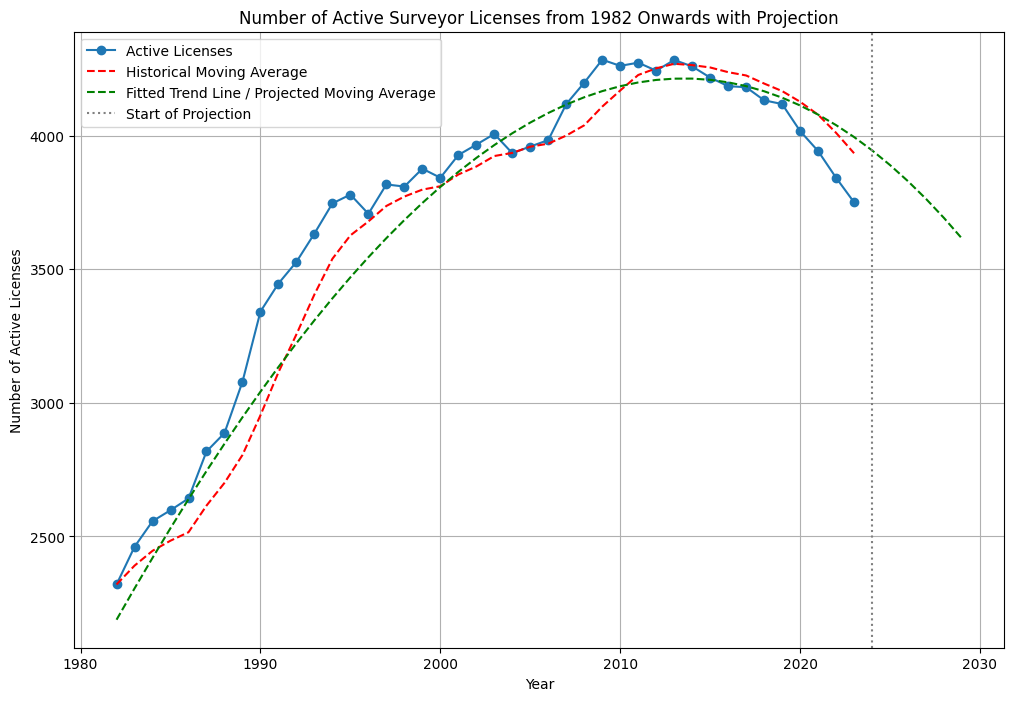

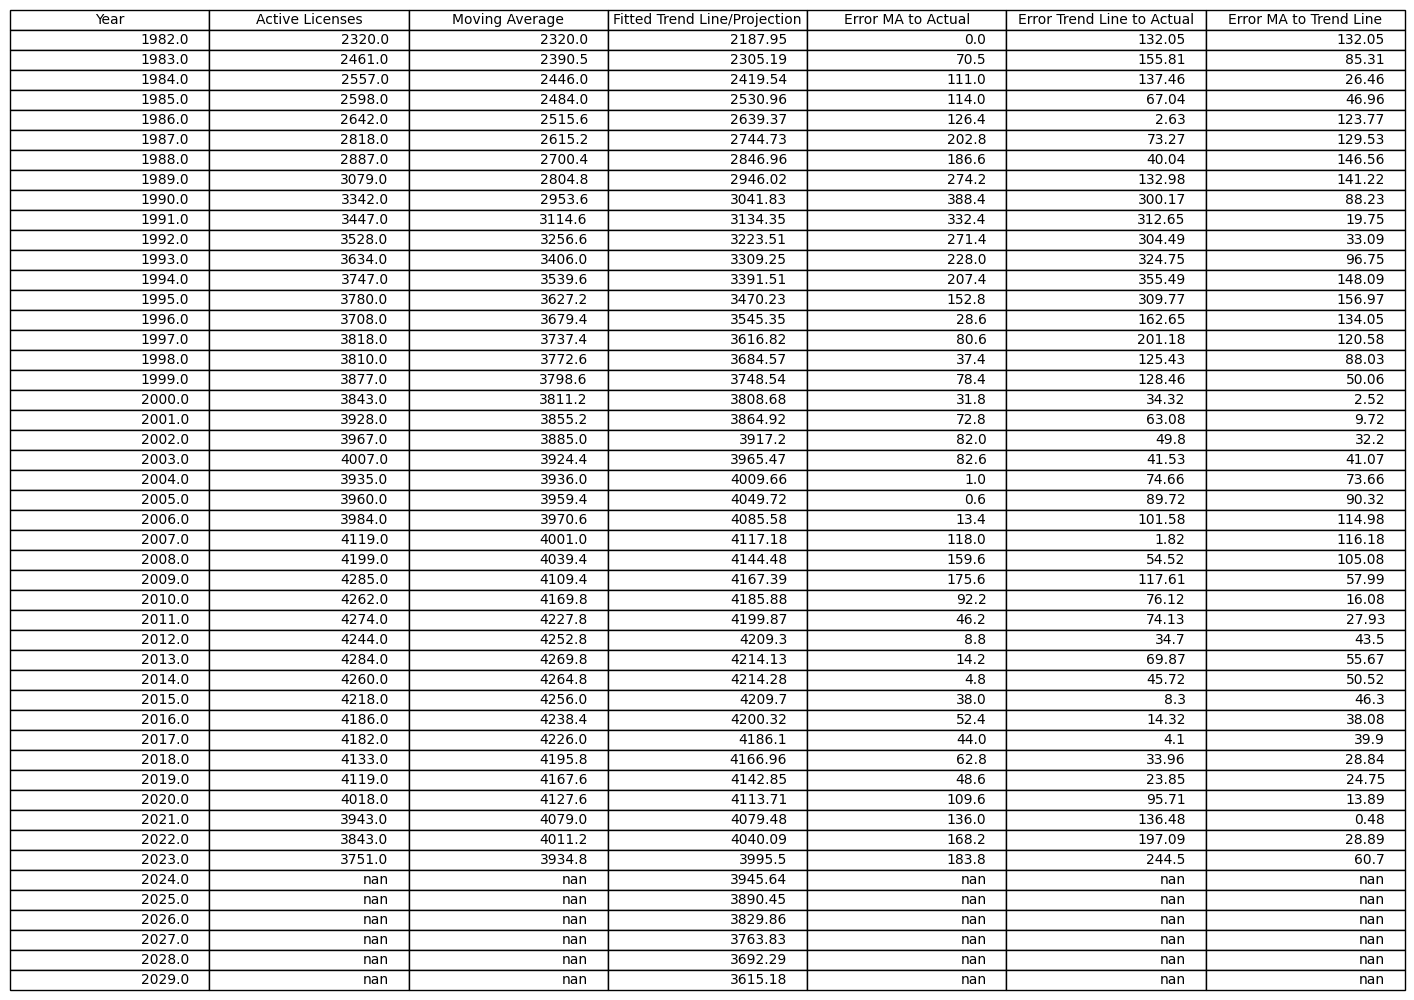

0.9822124021308397

In [39]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', window=5, projection_years=5, degree=3)

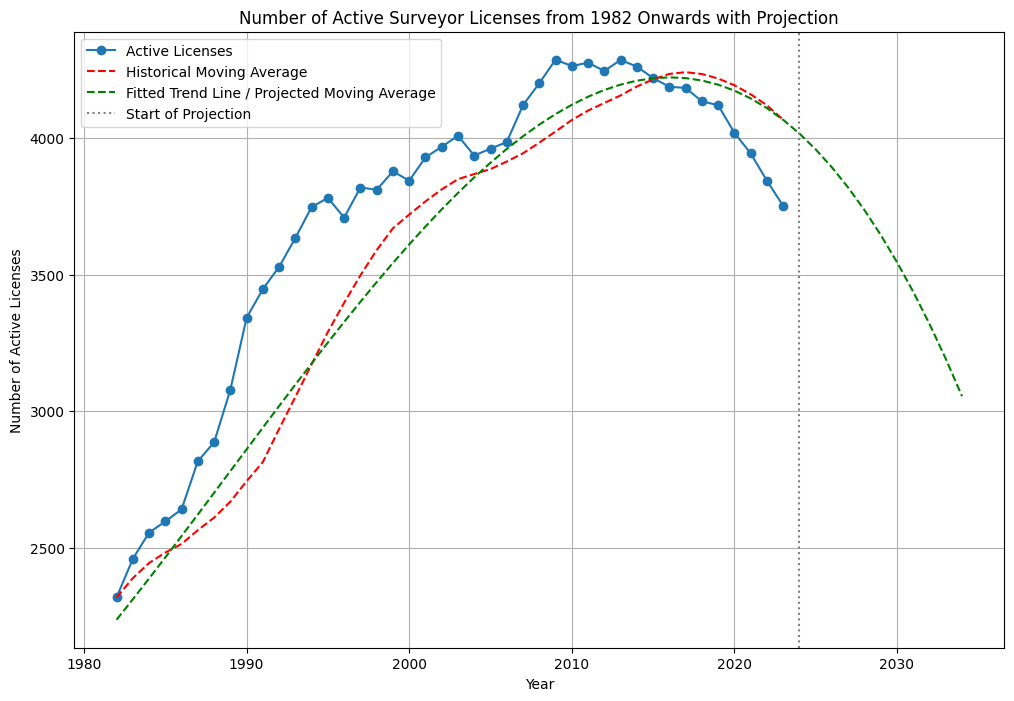

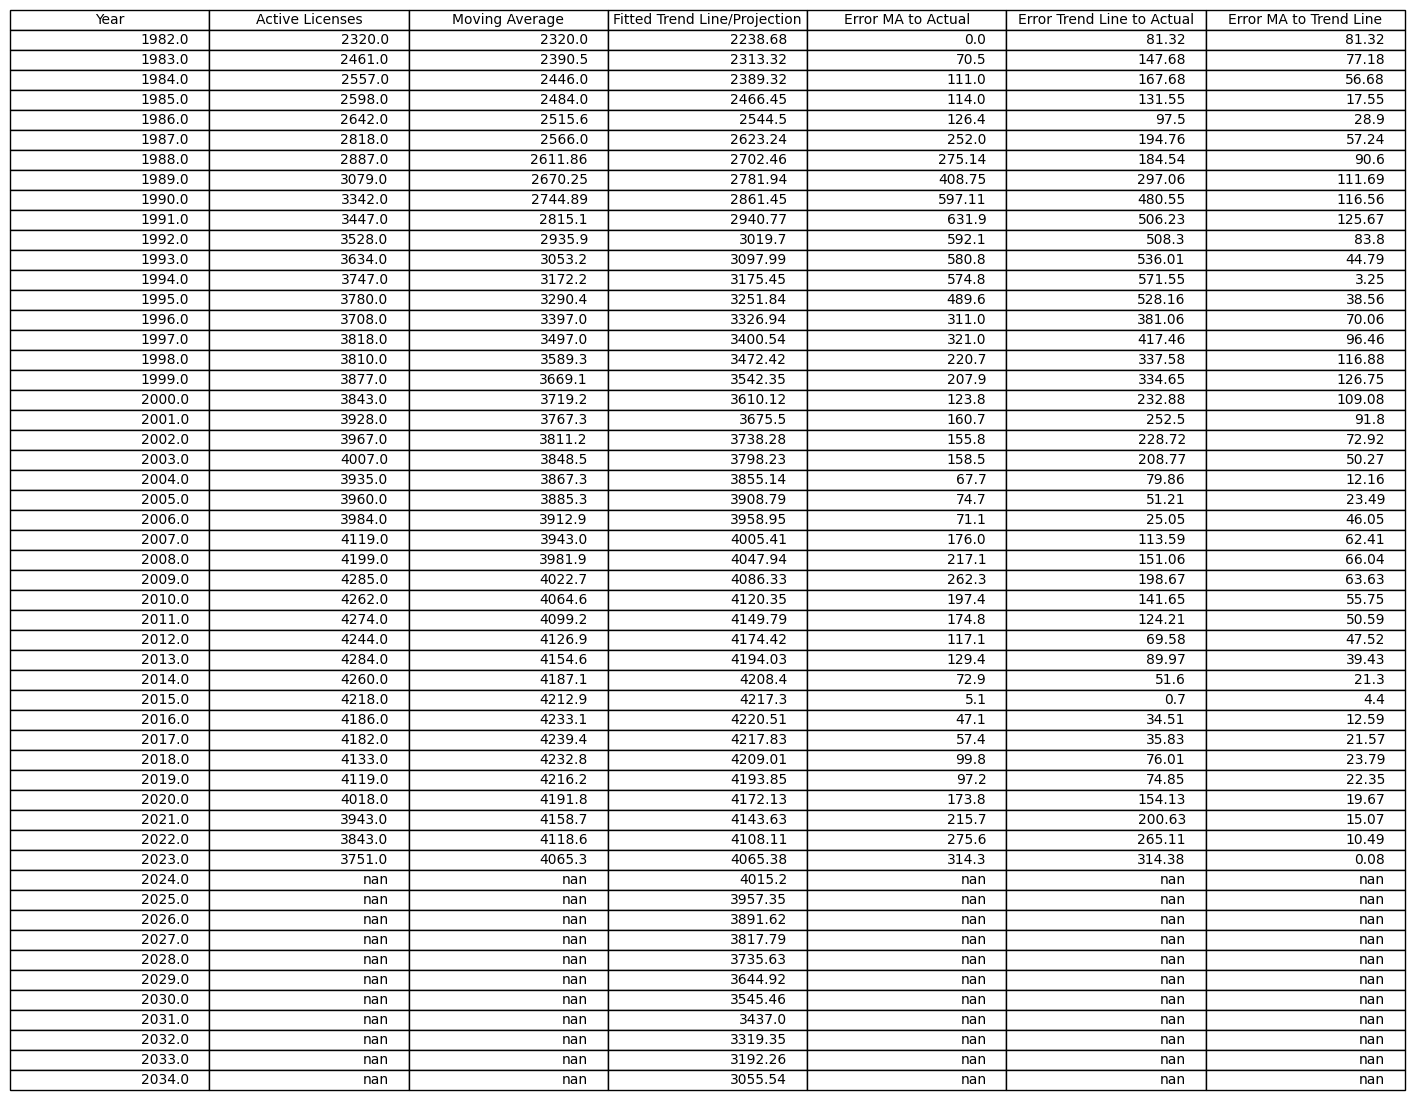

0.9896591710186592

In [40]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', window=10, projection_years=10, degree=3)

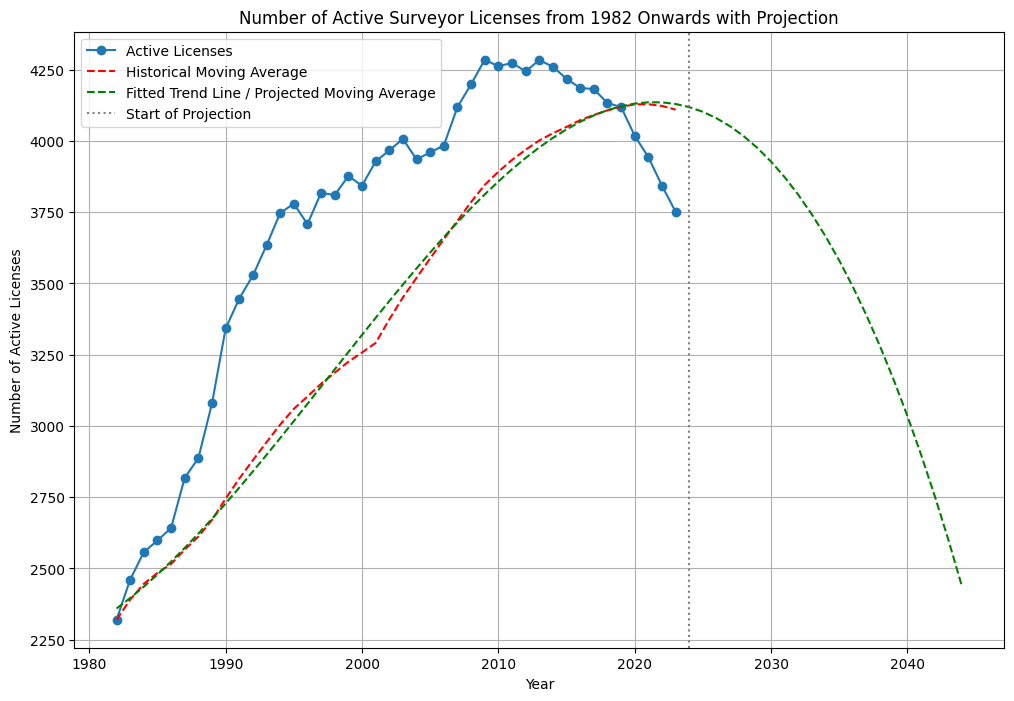

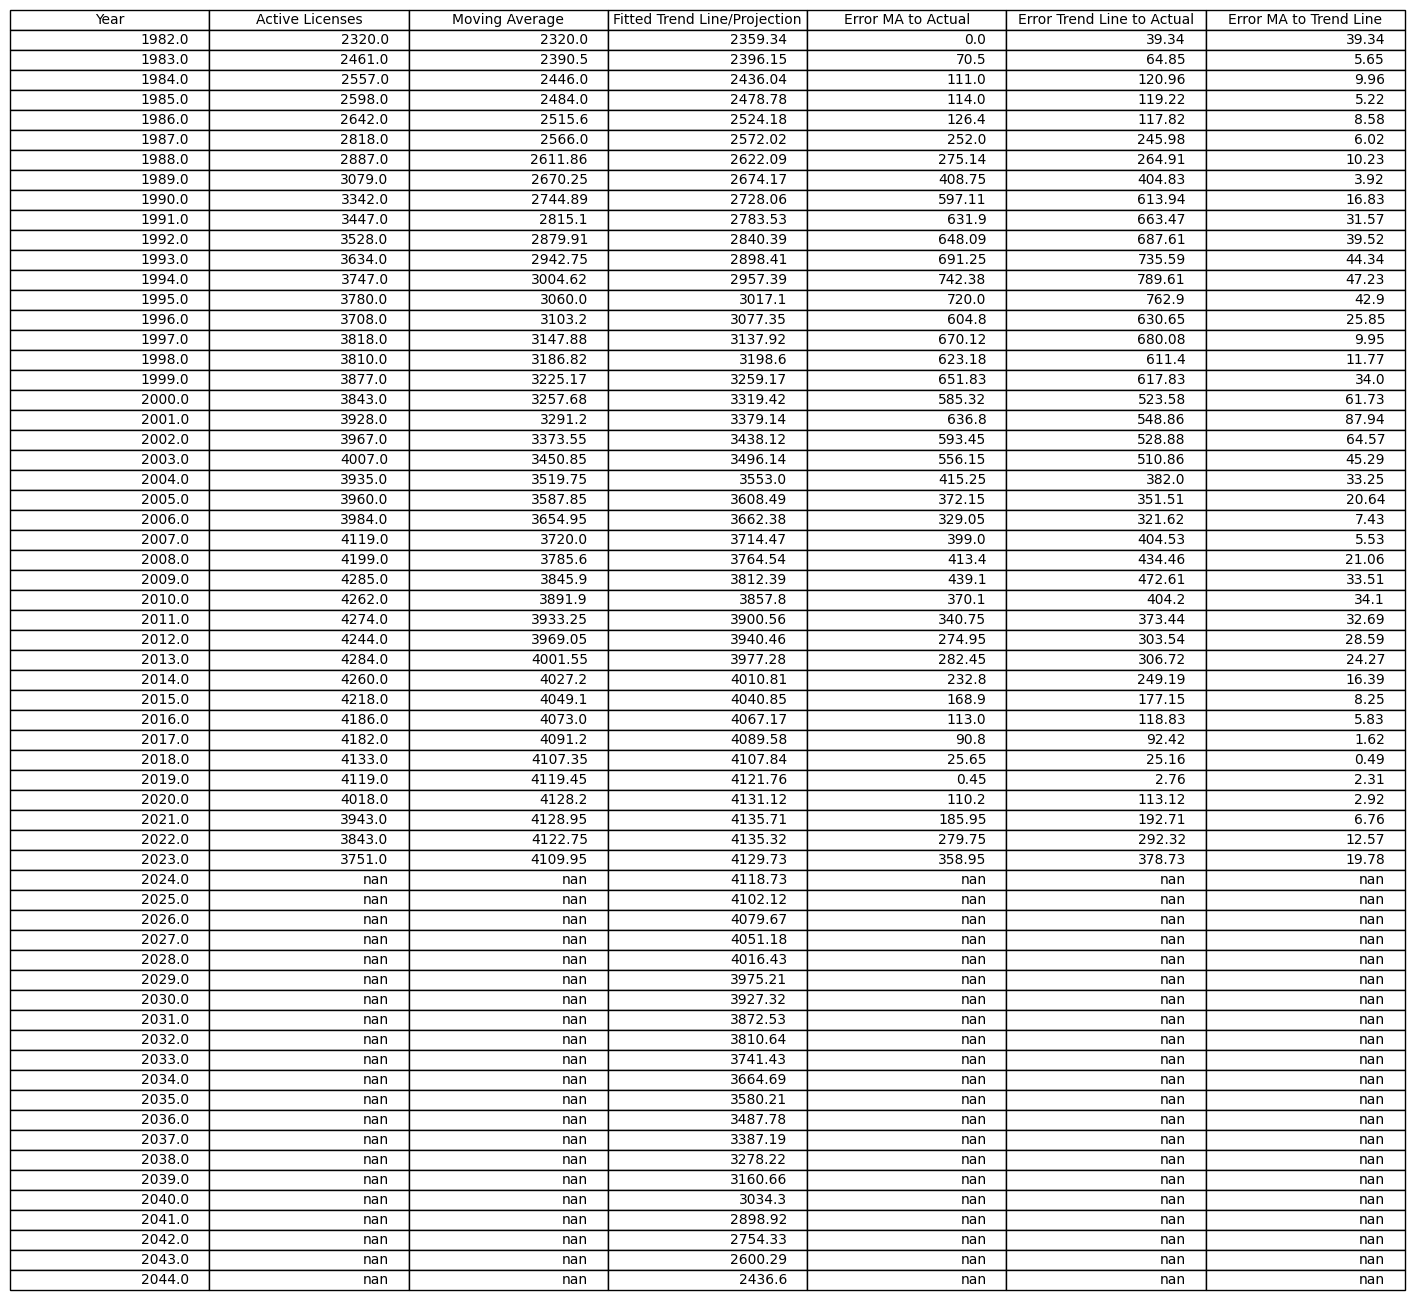

0.9974326825484948

In [41]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', window=20, projection_years=20, degree=3)

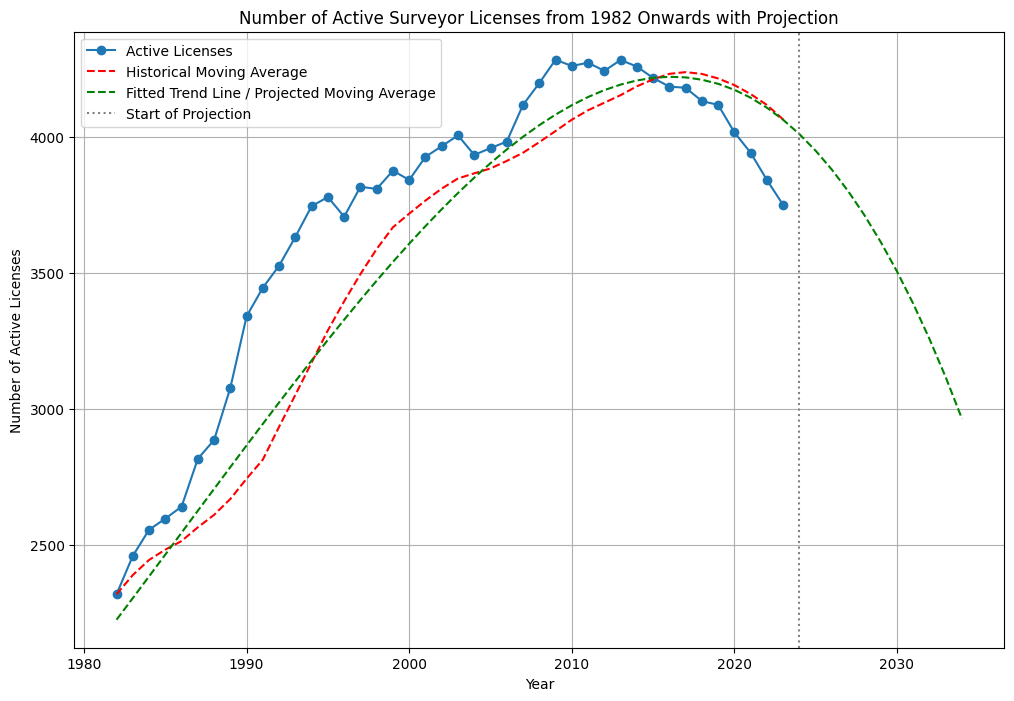

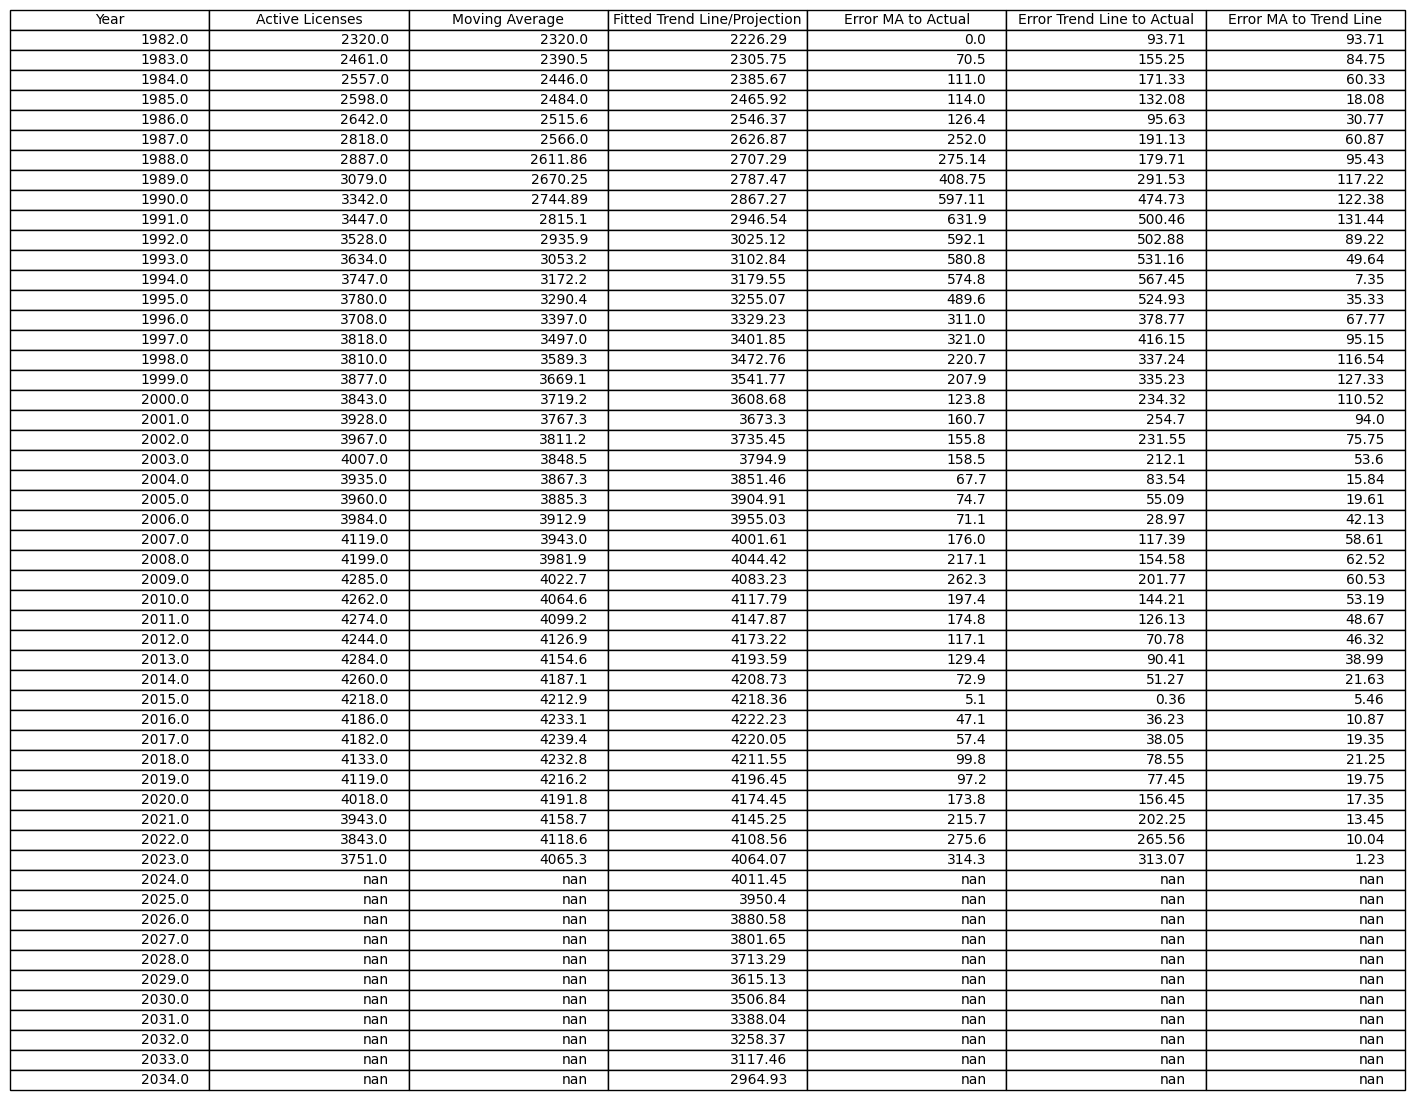

0.989153525283266

In [42]:
plot_active_licenses_with_projection_and_projected_table(df_raw_all_with_secondary, "Surveyor", 'Original Issue Date', 'Expiration Date', projection_years=10, degree=20)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def plot_license_distribution_with_details(df, issue_date_col, license_type_col, selected_license_type, num_categories):
    # Convert issue date column to datetime
    df[issue_date_col] = pd.to_datetime(df[issue_date_col], errors='coerce')

    # Filter data by selected license type
    df_filtered = df[df[license_type_col] == selected_license_type]

    # Calculate the age of each license from today
    df_filtered['License Age'] = datetime.now().year - df_filtered[issue_date_col].dt.year

    # Count licenses over 30 years of age
    licenses_over_30 = df_filtered[df_filtered['License Age'] > 25].shape[0]

    # Determine the range of license ages
    min_age = df_filtered['License Age'].min()
    max_age = df_filtered['License Age'].max()

    # Create age ranges for the categories
    age_ranges = np.linspace(min_age, max_age, num_categories + 1)

    # Categorize each license into an age group
    df_filtered['Age Group'] = pd.cut(df_filtered['License Age'], bins=age_ranges, include_lowest=True, right=False)

    # Group by age group, calculate count and get date range
    grouped = df_filtered.groupby('Age Group')
    age_distribution = grouped.size()
    date_ranges = grouped[issue_date_col].agg(['min', 'max'])

    # Merge count and date range data
    table_data = pd.DataFrame({
        'Age Group': age_distribution.index.categories,
        'Number of Licenses': age_distribution.values,
        'Issuance Date Range': date_ranges.apply(lambda x: f"{x['min'].date()} - {x['max'].date()}", axis=1)
    }).reset_index(drop=True)

    # Plotting bar chart and table
    fig, ax = plt.subplots(figsize=(18, 12))
    age_distribution.plot(kind='bar', ax=ax)
    ax.set_xlabel('License Age Groups (Years from Today)')
    ax.set_ylabel('Number of Licenses')
    ax.set_title(f'Distribution of {selected_license_type} Licenses by Age as of {datetime.now().date()}')
    ax.grid(True)

    # Annotate the total number of licenses over 30 years
    plt.text(0.95, 0.95, f'Number of licenses near retirement age (over 25 years of licensure): {licenses_over_30}',
             horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, color='red')

    # Creating table with actual values
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right', cellLoc='center')

    # Adjust layout to make room for table
    plt.subplots_adjust(right=0.7)
    plt.show()

# Example usage:
# plot_license_distribution_with_details(your_dataframe, 'issue_date_column_name', 'license_type_column_name', 'specific_license_type', num_categories=10)


C:\Users\James\AppData\Local\Temp\ipykernel_20692\1297622876.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['License Age'] = datetime.now().year - df_filtered[issue_date_col].dt.year
C:\Users\James\AppData\Local\Temp\ipykernel_20692\1297622876.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age Group'] = pd.cut(df_filtered['License Age'], bins=age_ranges, include_lowest=True, right=False)


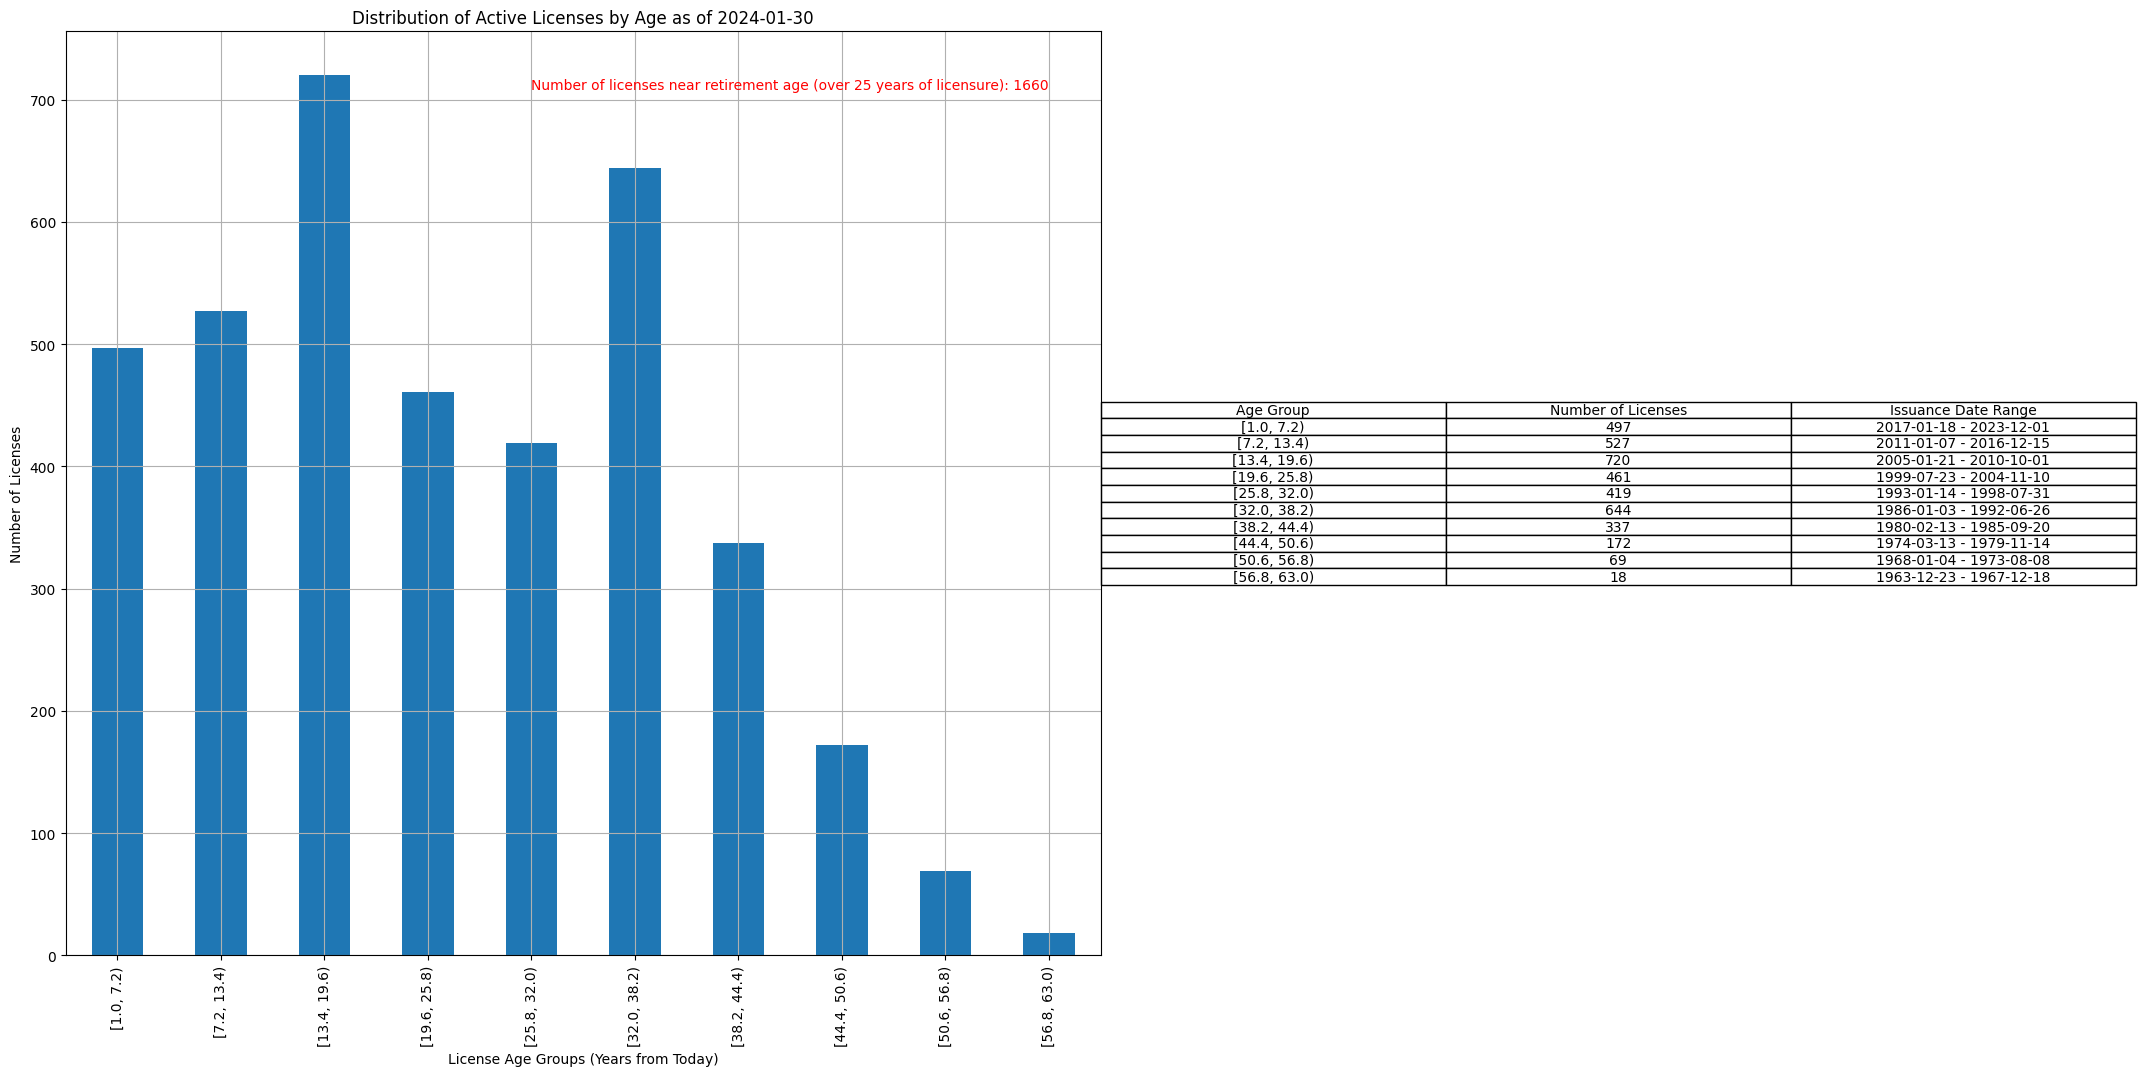

In [44]:
plot_license_distribution_with_details(df_raw_all_with_secondary, 'Original Issue Date', 'License Status', 'Active', num_categories=10)


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

def plot_out_of_state_licenses_line_chart(df, issue_date_col, state_status_col, out_of_state_indicators):
    # Convert issue date column to datetime
    df[issue_date_col] = pd.to_datetime(df[issue_date_col], errors='coerce')

    # Filter out-of-state licenses
    out_of_state_df = df[df[state_status_col].isin(out_of_state_indicators)]

    # Extract year from issue date
    out_of_state_df['Issue Year'] = out_of_state_df[issue_date_col].dt.year

    # Count the number of out-of-state licenses issued each year
    yearly_distribution = out_of_state_df['Issue Year'].value_counts().sort_index()

    # Plotting line chart
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(yearly_distribution.index, yearly_distribution.values, marker='o', linestyle='-')

    # Formatting the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Out-of-State Licenses')
    ax.set_title('Number of Out-of-State Licenses Issued Each Year')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # # Adding table with actual values
    # table_data = yearly_distribution.reset_index()
    # table_data.columns = ['Year', 'Licenses']
    # table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right', cellLoc='center')

    # Adjust layout to make room for table
    plt.subplots_adjust(right=0.7)
    plt.show()

# Example usage:
# plot_out_of_state_licenses_line_chart(your_dataframe, 'issue_date_column_name', 'state_status_column_name', out_of_state_indicators_list)


C:\Users\James\AppData\Local\Temp\ipykernel_20692\1038411350.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_state_df['Issue Year'] = out_of_state_df[issue_date_col].dt.year


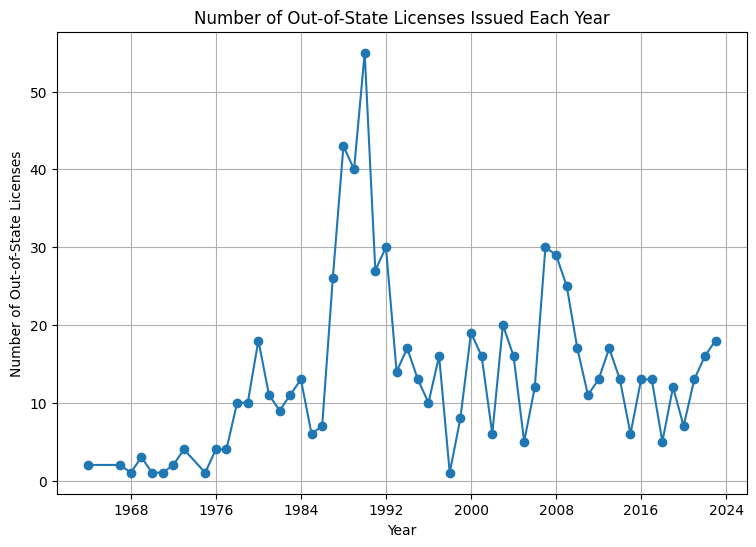

In [46]:

# Define new categories to be added
new_categories1 = ['out_of_state', 'OUT OF STATE', 'OUT OF COUNTRY']

plot_out_of_state_licenses_line_chart(df_raw_all_with_secondary, 'Original Issue Date', 'County', out_of_state_indicators=new_categories1)

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def plot_count_differences_with_moving_average(df, column1, column2, title, yaxis_name, window=10, ):
    # Convert 'column1' and 'column2' to datetime
    df[column1] = pd.to_datetime(df[column1], errors='coerce')
    df[column2] = pd.to_datetime(df[column2], errors='coerce')

    # Extract the year from 'column1' and 'column2' for grouping
    df['Year1'] = df[column1].dt.year
    df['Year2'] = df[column2].dt.year

    # Group the data by year and count the occurrences in each column
    grouped1 = df.groupby('Year1').agg({column1: 'count'})
    grouped2 = df.groupby('Year2').agg({column2: 'count'})

    # Merge the two grouped dataframes on the year and fill missing values
    merged = pd.merge(grouped1, grouped2, left_index=True, right_index=True, how='outer').fillna(0)

    # Get the end of the last year
    end_of_last_year = datetime.now().year - 1

    # Filter the data to include only up to the end of the last year
    merged = merged[merged.index <= end_of_last_year]

    # Calculate the yearly difference
    merged['Yearly Difference'] = merged[column1] - merged[column2]

    # Calculate the moving average
    merged['Moving Average'] = merged['Yearly Difference'].rolling(window=window, min_periods=1).mean()

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(merged.index, merged['Yearly Difference'], marker='o', label='Yearly Difference')
    plt.plot(merged.index, merged['Moving Average'], linestyle='--', color='red', label=f'{window}-Year Moving Average')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(yaxis_name)
    plt.legend()
    plt.grid(True)
    plt.show()


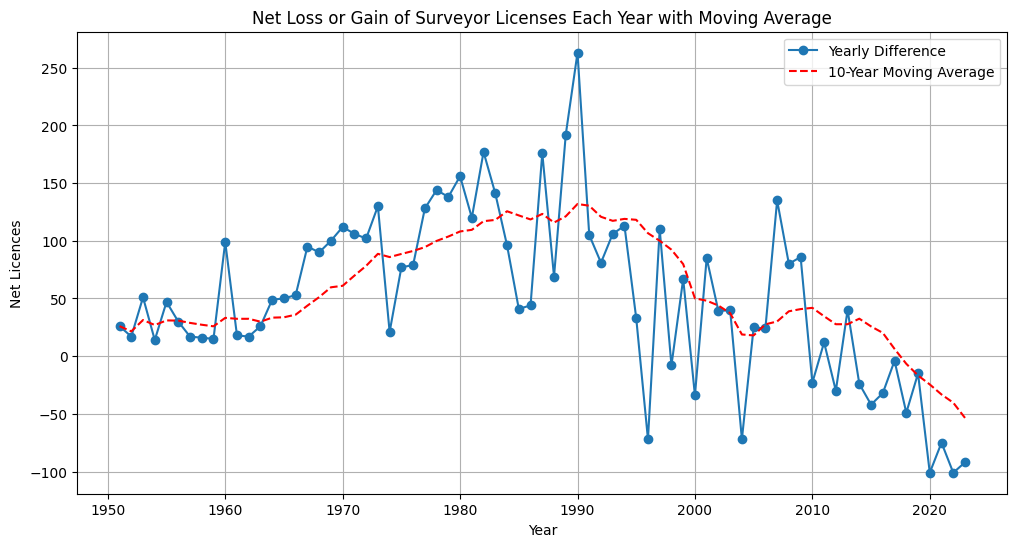

In [48]:
plot_count_differences_with_moving_average(df_raw_all_with_secondary,'Original Issue Date', 'Expiration Date','Net Loss or Gain of Surveyor Licenses Each Year with Moving Average', 'Net Licences')

In [49]:
def plot_yearly_differences_with_projection(df, column1, column2, nameword, window=10, projection_years=10, degree=3):
    # Convert 'column1' and 'column2' to datetime and extract years
    df[column1] = pd.to_datetime(df[column1], errors='coerce').dt.year
    df[column2] = pd.to_datetime(df[column2], errors='coerce').dt.year

    # Group by year and count occurrences
    grouped1 = df.groupby(column1).size()
    grouped2 = df.groupby(column2).size()

    # Merge and calculate yearly differences
    yearly_data = pd.merge(grouped1, grouped2, left_index=True, right_index=True, how='outer').fillna(0)
    yearly_data['Yearly Difference'] = yearly_data[column1] - yearly_data[column2]

    # Calculate moving average
    yearly_data['Moving Average'] = yearly_data['Yearly Difference'].rolling(window=window, min_periods=1).mean()

    # Fit polynomial regression
    current_year = datetime.now().year
    historical_years = yearly_data.index
    X = np.array(historical_years).reshape(-1, 1)
    y = yearly_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Project future values
    projection_end_year = current_year + projection_years
    projection_years_range = range(current_year, projection_end_year + 1)
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Combine historical and projected values for plotting
    all_years = list(historical_years) + list(projection_years_range)
    all_fitted_values = list(model.predict(X_poly)) + list(projection_Y)
    combined_data = pd.DataFrame({'Year': all_years, 'Yearly Difference': yearly_data['Yearly Difference'], 
                                  'Moving Average': yearly_data['Moving Average'], 
                                  'Fitted Trend Line/Projection': all_fitted_values})

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data['Year'], combined_data['Yearly Difference'], marker='o', label='Yearly Difference')
    plt.plot(combined_data['Year'], combined_data['Moving Average'], linestyle='--', color='red', label='Moving Average')
    plt.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], linestyle='-', color='green', label='Fitted Trend Line / Projection')
    plt.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    plt.title(f'{nameword} Yearly Differences with Historical Data and Polynomial Projection')
    plt.xlabel('Year')
    plt.ylabel('Yearly Difference')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return R² value of the model
    return model.score(X_poly, y)


In [50]:
# plot_yearly_differences_with_projection(df_raw_all_with_secondary,'Original Issue Date', 'Expiration Date','Surveyors', window=10, projection_years=10, degree=3)

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime

def plot_net_gain_loss_of_surveyors_with_errors(df, nameword, issue_date_column, expiration_date_column, window=10, projection_years=10, degree=3):
    # Convert date columns to datetime
    df[issue_date_column] = pd.to_datetime(df[issue_date_column], errors='coerce')
    df[expiration_date_column] = pd.to_datetime(df[expiration_date_column], errors='coerce')

    # Define the range for historical data and future projection
    start_year = 1970
    current_year = datetime.now().year
    historical_end_year = current_year - 1
    projection_end_year = current_year + projection_years
    historical_years = range(start_year, historical_end_year + 1)
    projection_years_range = range(current_year, projection_end_year + 1)

    # Function to count issued and expired licenses for a given year
    def count_issued(year):
        return df[df[issue_date_column].dt.year == year].shape[0]

    def count_expired(year):
        return df[df[expiration_date_column].dt.year == year].shape[0]

    # Calculate issued and expired licenses for each year in the historical range
    net_gain_loss_per_year = {}
    for year in historical_years:
        issued = count_issued(year)
        expired = count_expired(year)
        net_gain_loss_per_year[year] = issued - expired

    # Create DataFrame for historical data
    historical_data = pd.DataFrame(list(net_gain_loss_per_year.items()), columns=['Year', 'Net Gain/Loss'])

    # Calculate the moving average for net gain/loss
    historical_data['Moving Average'] = historical_data['Net Gain/Loss'].rolling(window=window, min_periods=1).mean()

    # Fit a polynomial regression model to the moving average of net gain/loss
    X = historical_data['Year'].values.reshape(-1, 1)
    y = historical_data['Moving Average'].values
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Compute R² value
    r2_value = model.score(X_poly, y)

    # Calculate fitted values (trend line) for historical years
    fitted_values = model.predict(X_poly)
    historical_data['Fitted Trend Line'] = fitted_values

    # Calculate errors
    historical_data['Error MA to Actual'] = np.abs(historical_data['Net Gain/Loss'] - historical_data['Moving Average'])
    historical_data['Error Trend Line to Actual'] = np.abs(historical_data['Net Gain/Loss'] - historical_data['Fitted Trend Line'])

    # Project the moving average for the next 10 years
    projection_X = np.array(list(projection_years_range)).reshape(-1, 1)
    projection_X_poly = polynomial_features.transform(projection_X)
    projection_Y = model.predict(projection_X_poly)

    # Ensure all arrays are of the same length
    all_years = list(historical_years) + list(projection_years_range)
    all_net_gain_loss = list(historical_data['Net Gain/Loss']) + [np.nan] * len(projection_years_range)
    all_moving_averages = list(historical_data['Moving Average']) + [np.nan] * len(projection_years_range)
    all_fitted_values = list(fitted_values) + list(projection_Y)
    all_errors_MA = list(historical_data['Error MA to Actual']) + [np.nan] * len(projection_years_range)
    all_errors_trend = list(historical_data['Error Trend Line to Actual']) + [np.nan] * len(projection_years_range)

    # Combine into a DataFrame
    combined_data = pd.DataFrame({
        'Year': all_years,
        'Net Gain/Loss': all_net_gain_loss,
        'Moving Average': all_moving_averages,
        'Fitted Trend Line/Projection': all_fitted_values,
        'Error MA to Actual': all_errors_MA,
        'Error Trend Line to Actual': all_errors_trend
    })

    # Plotting the Graph
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(combined_data['Year'], combined_data['Net Gain/Loss'], marker='o', label='Net Gain/Loss')
    ax.plot(combined_data['Year'], combined_data['Moving Average'], 'r--', label='Moving Average')
    ax.plot(combined_data['Year'], combined_data['Fitted Trend Line/Projection'], 'g--', label='Projected Trend')
    ax.axvline(x=current_year, color='gray', linestyle=':', label='Start of Projection')
    ax.set_title(f'Yearly Net Gain/Loss of {nameword} Licenses from {start_year} Onwards with Projection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Net Gain/Loss')
    ax.legend()
    ax.grid(True)
    plt.show()

    # Plotting the Table
    fig, ax_table = plt.subplots(figsize=(12, 8))  # Adjust size as needed
    ax_table.axis('tight')
    ax_table.axis('off')
    table_data = combined_data.round(2)
    table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

    return r2_value

# This function now includes error calculations and a better layout for the plot and table.


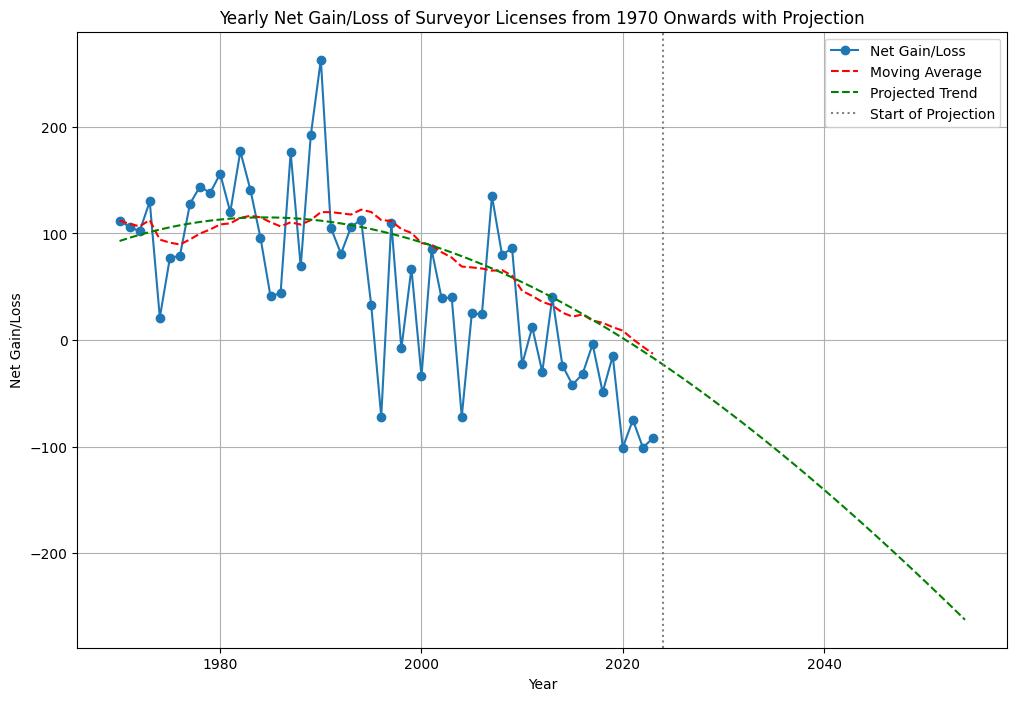

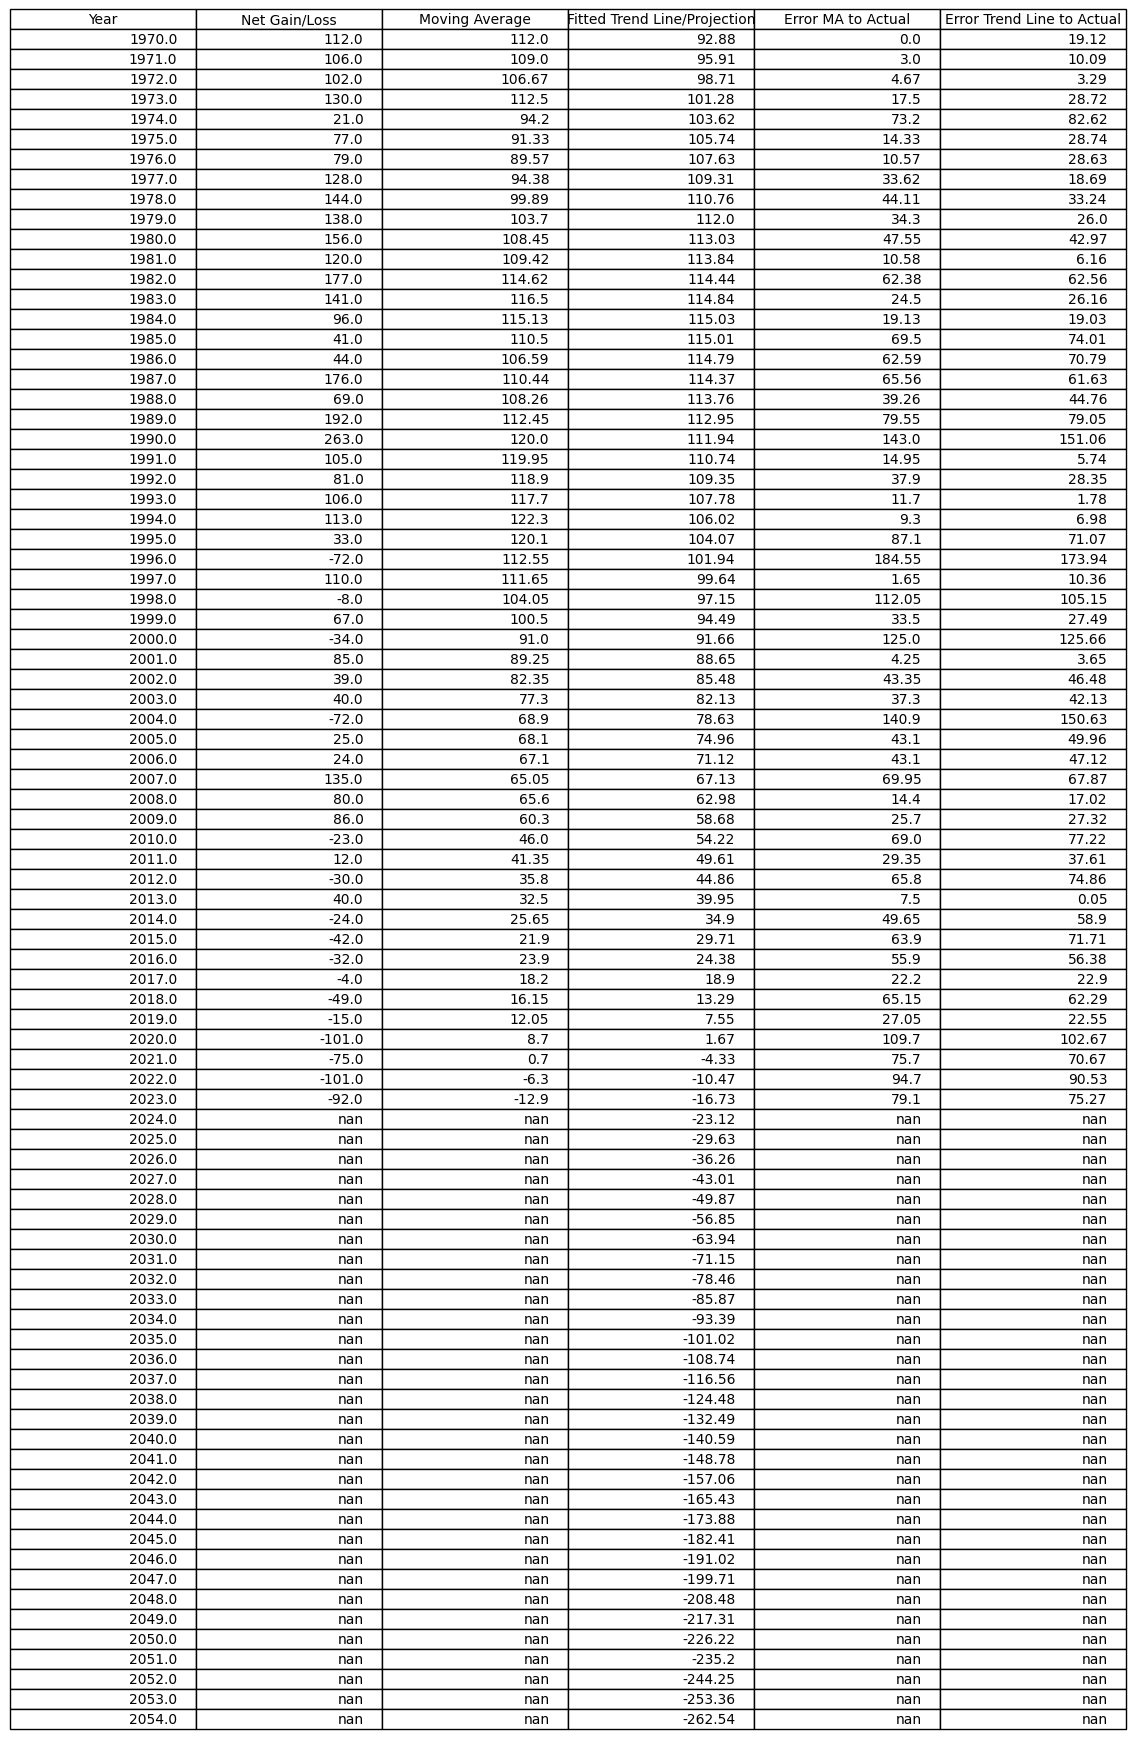

0.954337993163472

In [58]:
plot_net_gain_loss_of_surveyors_with_errors(df_raw_all_with_secondary,'Surveyor', 'Original Issue Date', 'Expiration Date', window=20, projection_years=30, degree=3)